### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Load Dataset and Initial Inspection

In [2]:
# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Display the first few rows and column information to identify the churn indicator
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Customer Churn Definition in Telecom Industry

1.  **General Definition of Customer Churn:**
    In the telecom industry, customer churn (or customer attrition) refers to the phenomenon where customers discontinue their service relationship with a provider.
    
    * This can involve cancelling subscriptions, switching to a competitor, or simply ceasing to use the service. Churn is a critical metric for telecom companies as it directly impacts revenue and profitability.
    
    * High churn rates often indicate customer dissatisfaction, competitive pressure, or issues with service quality.

2.  **Churn Representation in 'telecom_churn.csv' Dataset:**
    Upon inspecting the `telecom_churn.csv` dataset, the column named `Churn` directly indicates whether a customer has churned or not. This column contains categorical values: 'Yes' and 'No'.

3.  **Definition of 'Churned' and 'Non-Churned' Customers:**
    *   A **'churned' customer** is identified by the `Churn` column having a value of **'Yes'**. This signifies that the customer has terminated their service with the telecom provider.
    *   A **'non-churned' customer** is identified by the `Churn` column having a value of **'No'**. This signifies that the customer is still actively using the telecom provider's services.  

### Importance of Churn Analysis

### Business Significance of Churn Analysis

1.  **Critical Metric for Telecom Companies**: Customer churn is a paramount metric for telecom companies because their business model relies heavily on recurring revenue from subscriptions. A high churn rate directly translates to a shrinking customer base and diminished revenue, making it a key indicator of business health and sustainability. Maintaining existing customers is often far more cost-effective than acquiring new ones.

2.  **Financial Implications**: High churn rates have significant financial ramifications:
    *   **Loss of Recurring Revenue**: Each churned customer represents a direct loss of future subscription fees, which are the lifeblood of telecom companies.
    *   **Increased Acquisition Costs**: Companies must spend substantial resources (marketing, sales, promotions) to replace lost customers. These customer acquisition costs (CAC) can quickly erode profitability if churn is not managed effectively.
    *   **Reduced Cross-selling and Upselling Opportunities**: Loyal customers are more likely to purchase additional services or upgrade their plans. Churn leads to a loss of these lucrative opportunities.

3.  **Impact on Customer Lifetime Value (CLTV) and Profitability**: Churn directly undermines Customer Lifetime Value (CLTV), which is the total revenue a business expects to earn from a customer over their entire relationship. When customers churn, their CLTV drops to zero, impacting overall profitability. Reducing churn means increasing the average customer tenure, thereby maximizing CLTV and contributing more significantly to the company's bottom line.

4.  **Competitive Advantage**: In a highly competitive market like telecommunications, effective churn analysis and reduction can provide a strong competitive advantage:
    *   **Customer Retention Strategies**: By understanding *why* customers churn, companies can develop targeted retention strategies, personalize offers, and improve service quality, making them more attractive than competitors.
    *   **Market Share Protection**: Proactive churn management helps protect market share by retaining existing customers and preventing them from switching to competitors.
    *   **Reputation**: A company with low churn rates signals strong customer satisfaction and service quality, enhancing its brand reputation.

5.  **Other Potential Impacts**:
    *   **Brand Reputation**: High churn can signal dissatisfaction, negatively impacting brand perception and making it harder to attract new customers through word-of-mouth.
    *   **Operational Efficiency**: Understanding churn drivers can help identify operational inefficiencies or service weaknesses, leading to improvements in customer support, network quality, or product offerings.
    *   **Data-Driven Decision Making**: Churn analysis provides valuable insights into customer behavior, preferences, and pain points, enabling data-driven decisions across various departments, from marketing to product development.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### Handle 'TotalCharges' Data Type and Missing Values

* Convert the 'TotalCharges' column to a numeric data type, coercing any non-numeric values to NaN.
* Then, calculate the median of this column to use for imputing missing values.
* After imputation, then verify that there are no remaining missing values and check the column's data type to ensure the conversion is successful.


In [6]:
# 1. Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Identify and count missing values (NaNs) after conversion
initial_missing_totalcharges = df['TotalCharges'].isnull().sum()
print(f"Initial missing values in 'TotalCharges' after conversion: {initial_missing_totalcharges}")

# 3. Fill missing values with the median of 'TotalCharges'
# Calculate median *after* converting to numeric
median_totalcharges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_totalcharges)
print(f"'TotalCharges' missing values filled with median: {median_totalcharges}")

# 4. Verify no remaining missing values and check data type
final_missing_totalcharges = df['TotalCharges'].isnull().sum()
print(f"Final missing values in 'TotalCharges': {final_missing_totalcharges}")
print(f"Data type of 'TotalCharges' after processing: {df['TotalCharges'].dtype}")

Initial missing values in 'TotalCharges' after conversion: 11
'TotalCharges' missing values filled with median: 1397.475
Final missing values in 'TotalCharges': 0
Data type of 'TotalCharges' after processing: float64


### Validate 'Churn' The Target Variable

Inspect the 'Churn' column (check the unique values and their counts) to ensure it is consistent and suitable for modeling. This involves checking unique values, their counts, and converting the target variable into a binary numerical format (e.g., 0 for 'No' and 1 for 'Yes') if necessary.


In [7]:
print(df['Churn'].value_counts())
print(f"Unique values in 'Churn' before conversion: {df['Churn'].unique()}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Unique values in 'Churn' before conversion: ['No' 'Yes']


Convert the 'Churn' column from its current categorical format ('Yes', 'No') into a binary numerical format (1 for 'Yes', 0 for 'No').

After conversion, verify the data type of the 'Churn' column and display its unique values and their counts to confirm the change.



In [8]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(f"Data type of 'Churn' after conversion: {df['Churn'].dtype}")
print(df['Churn'].value_counts())
print(f"Unique values in 'Churn' after conversion: {df['Churn'].unique()}")

Data type of 'Churn' after conversion: int64
Churn
0    5174
1    1869
Name: count, dtype: int64
Unique values in 'Churn' after conversion: [0 1]


### Observation:

- The dataset is now prepared for further exploratory data analysis and feature engineering.

#### The Findings
*   **Customer Churn Definition**: In the `telecom_churn.csv` dataset, customer churn is indicated by the `Churn` column, where 'Yes' signifies a churned customer (terminated service) and 'No' signifies a non-churned customer (active service).
*   **Business Significance of Churn**: Churn is a critical metric for telecom companies, directly impacting revenue, increasing customer acquisition costs, and reducing Customer Lifetime Value (CLTV). Effective churn analysis provides a competitive advantage by enabling targeted retention strategies and protecting market share.
*   **Numerical Column Statistics**: Initial inspection of numerical columns (`SeniorCitizen`, `tenure`, `MonthlyCharges`) provided descriptive statistics (count, mean, std, min, max, quartiles), offering an initial understanding of their distributions.
*   **'TotalCharges' Column Processing**: The `TotalCharges` column was successfully converted to a numeric (`float64`) data type. Initially, 11 missing values were identified, which were then imputed using the median value of the column (1397.475). After processing, the column contains no missing values.
*   **'Churn' Target Variable Conversion**: The `Churn` column, initially categorical ('Yes', 'No'), was successfully converted into a binary numerical format. 'Yes' was mapped to 1 and 'No' was mapped to 0. The original distribution showed 5174 'No' instances and 1869 'Yes' instances, which now correspond to 0s and 1s, respectively, in an `int64` format.

#### Next Steps
*   The imbalance in the 'Churn' target variable `(5174 'No' vs. 1869 'Yes')` indicates that during model training, techniques to handle class imbalance (e.g., oversampling, undersampling, or using appropriate evaluation metrics) will be considered to prevent bias towards the majority class.
*   Given the successful data cleaning and transformation, the next steps would involve comprehensive Exploratory Data Analysis (EDA) to uncover relationships between features and the 'Churn' target, followed by feature engineering to create more predictive variables.


### Exploratory Data Analysis (EDA)
Perform a comprehensive Exploratory Data Analysis (EDA) on the `df` DataFrame to understand data characteristics, churn distribution, and relationships between features and churn.
This involves:
- displaying the dataset's shape and data types;
- providing a statistical summary for all columns;
- visualizing the distribution of the 'Churn' target variable; analyzing numerical features ('tenure', 'MonthlyCharges', 'TotalCharges') against 'Churn' using distribution and box/violin plots;
- examining all categorical features against 'Churn' using count or stacked bar plots;
- computing and visualizing the correlation matrix for numerical features; and
- summarizing the key insights derived from this EDA phase.

### Data Inspection and Statistical Summary

- Display the shape of the dataset,
- Check data types again, and
- Statistical summary for all columns (numerical and categorical) to understand distributions, central tendencies, and unique values across the entire dataset.


In [9]:
print(f"Shape of the dataset: {df.shape}\n")
print(df.info())
print("\nDescriptive statistics for all columns:")
print(df.describe(include='all'))

Shape of the dataset: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

### Churn Distribution Analysis

Visualizing the distribution of the target variable 'Churn' using a count plot to understand the class imbalance and the overall proportion of churned customers in the dataset.

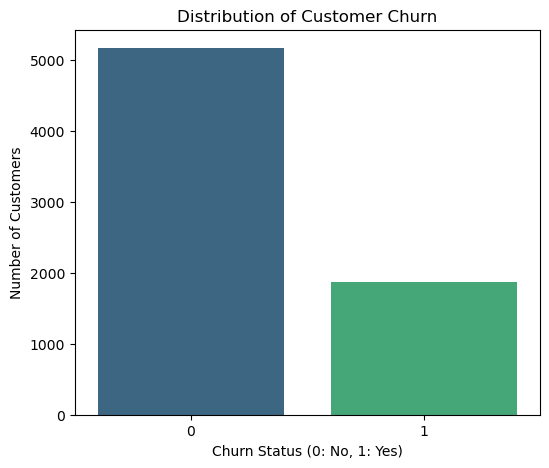

In [10]:
# Create a count plot for the 'Churn' column
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

### Numerical Feature Analysis vs Churn

Analyzing key numerical features such as 'tenure', 'MonthlyCharges', and 'TotalCharges' in relation to churn.


Create distribution plots (histograms/KDEs) for each, comparing churned vs non-churned customers.


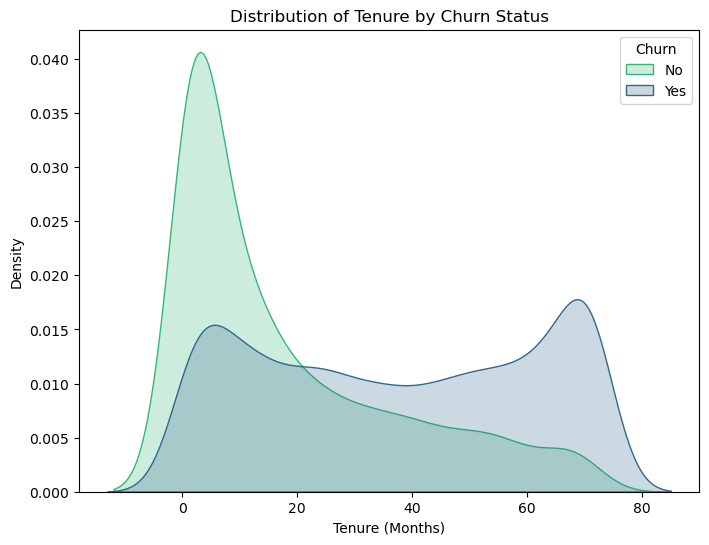

In [11]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

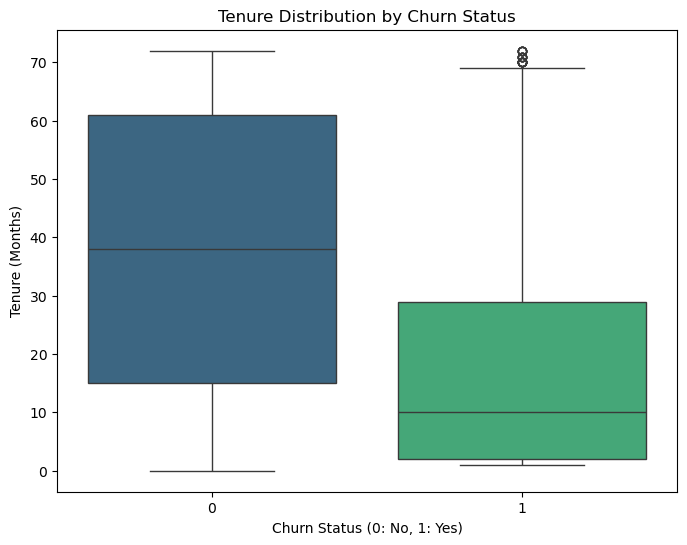

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn Status (0: No, 1: Yes)')
plt.ylabel('Tenure (Months)')
plt.show()

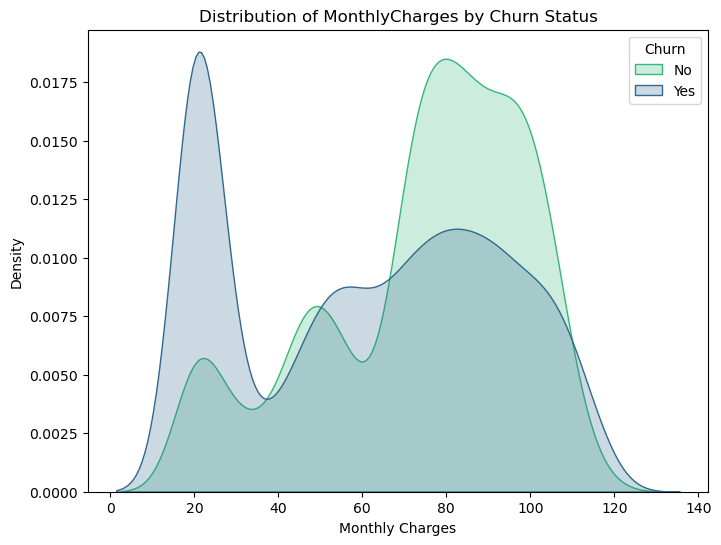

In [13]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of MonthlyCharges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

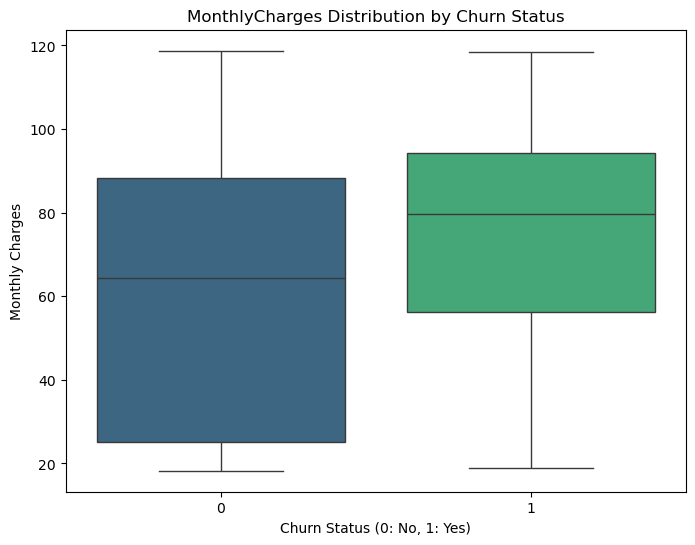

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('MonthlyCharges Distribution by Churn Status')
plt.xlabel('Churn Status (0: No, 1: Yes)')
plt.ylabel('Monthly Charges')
plt.show()

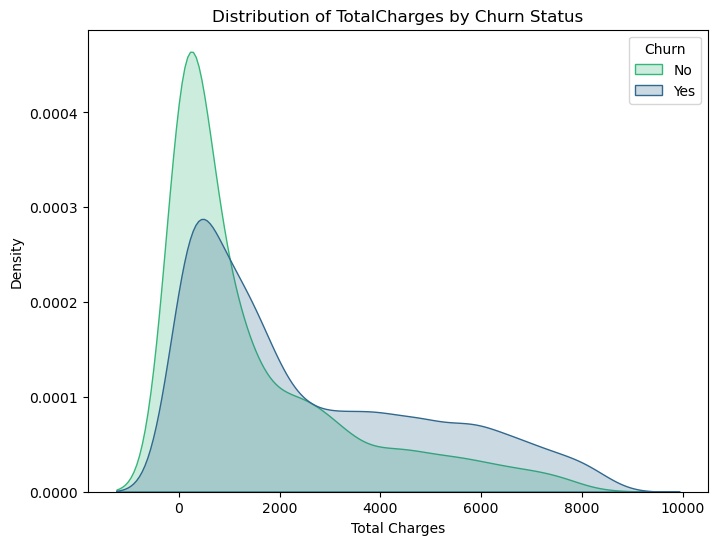

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of TotalCharges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

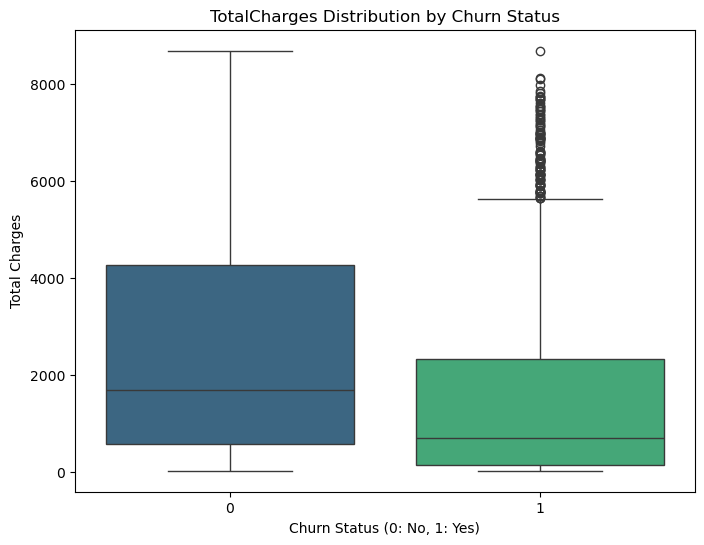

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('TotalCharges Distribution by Churn Status')
plt.xlabel('Churn Status (0: No, 1: Yes)')
plt.ylabel('Total Charges')
plt.show()

### Categorical Feature Analysis vs Churn

Examining all categorical features against 'Churn' to identify potential relationships.

In [17]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID') # customerID is unique and not a feature

print(f"Categorical columns for analysis: {categorical_cols}")

Categorical columns for analysis: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


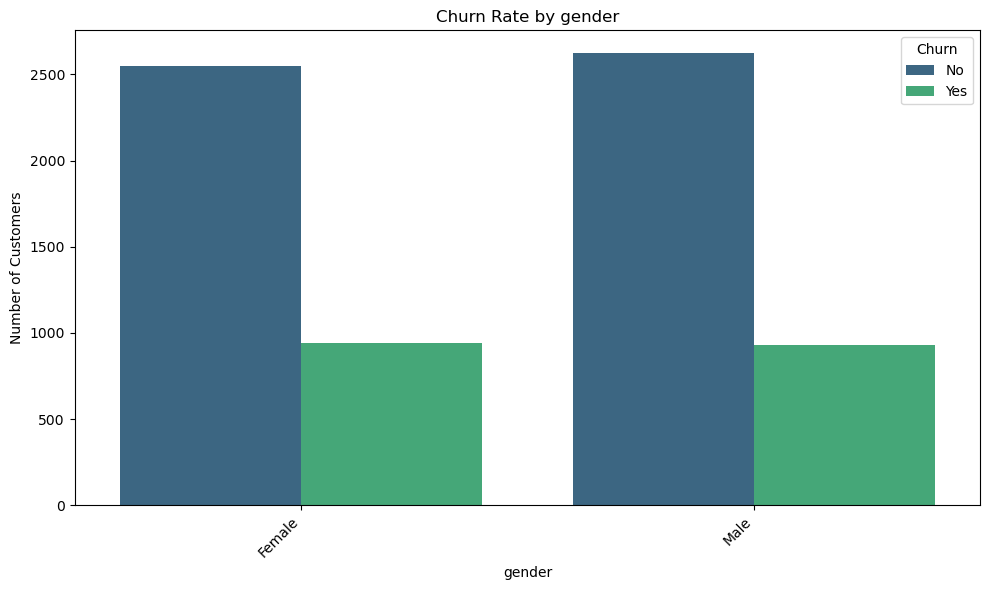

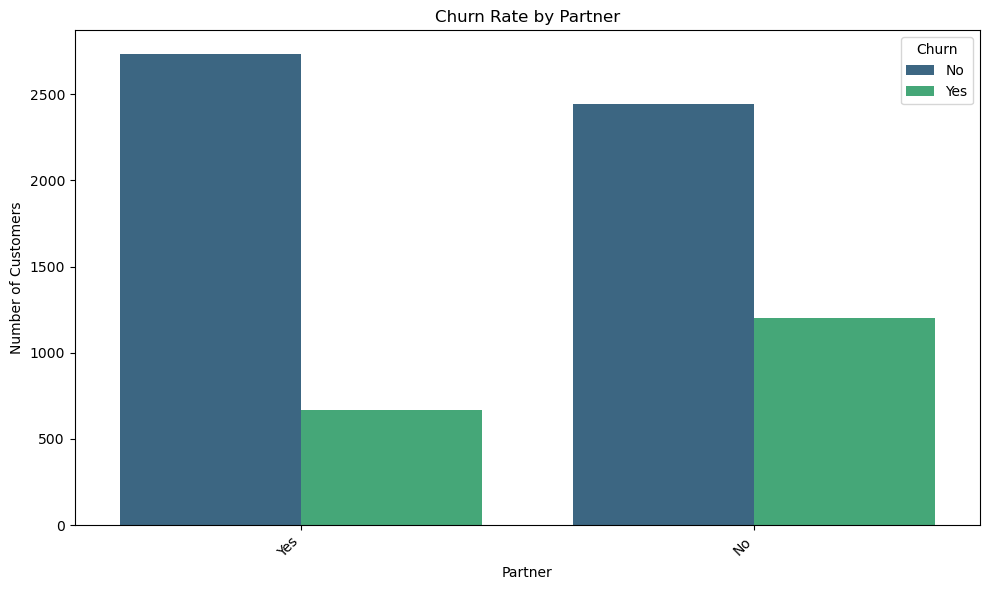

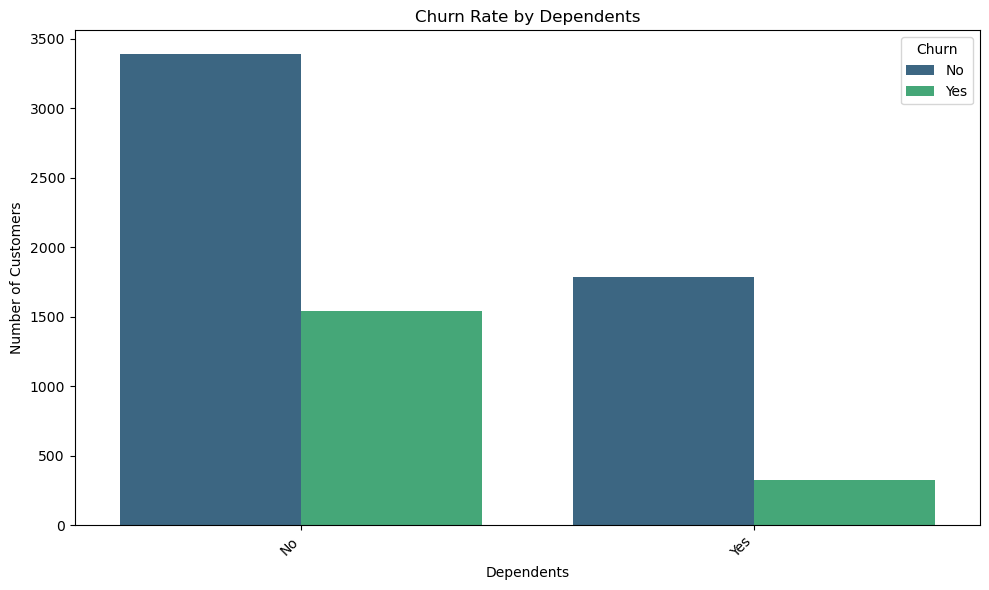

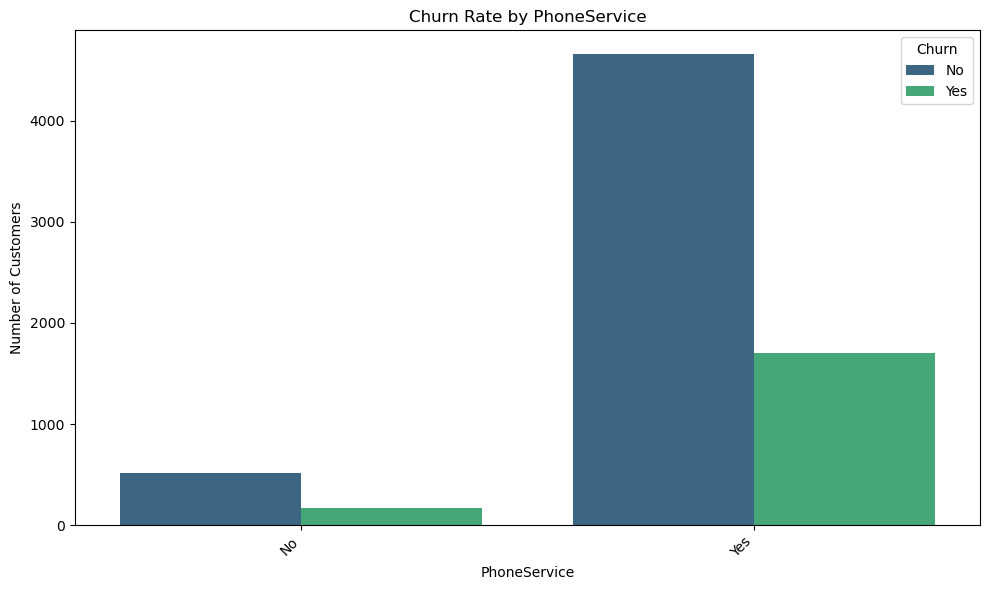

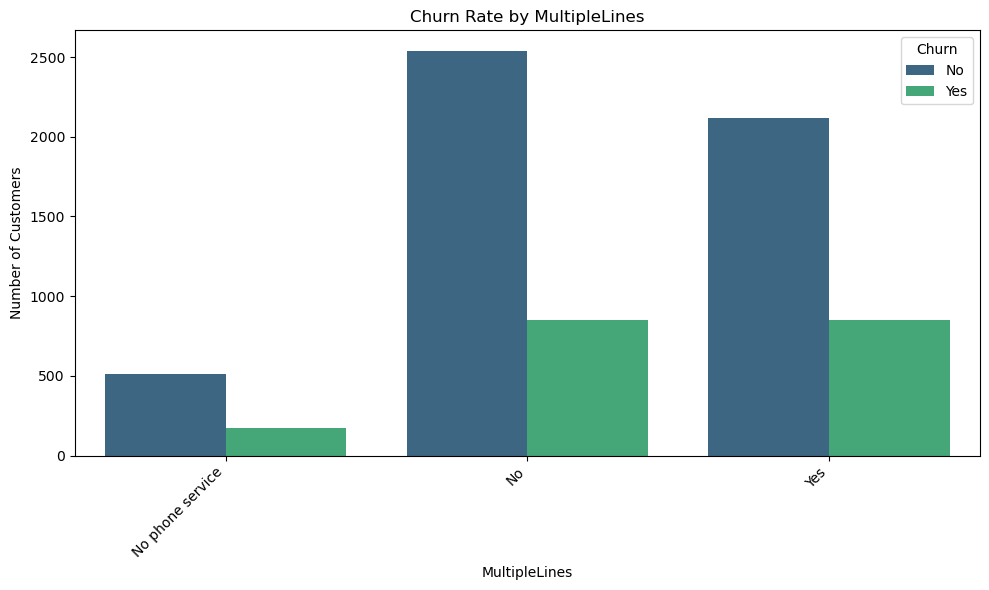

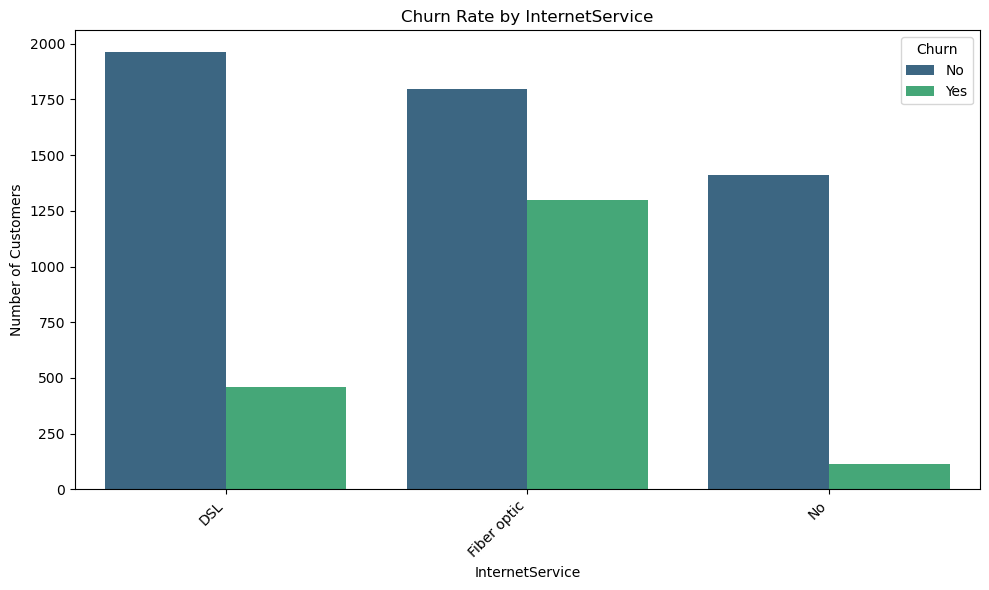

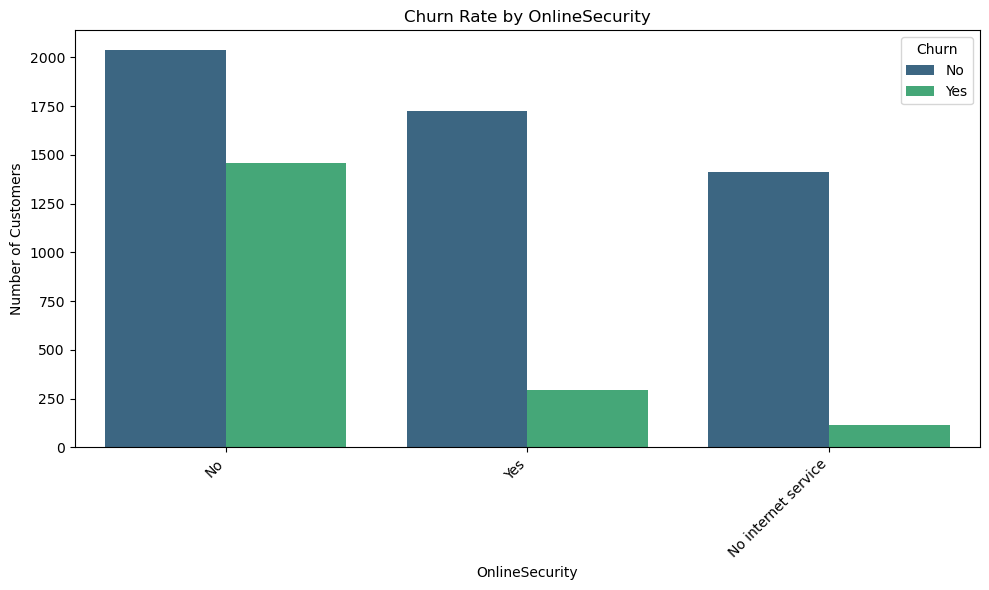

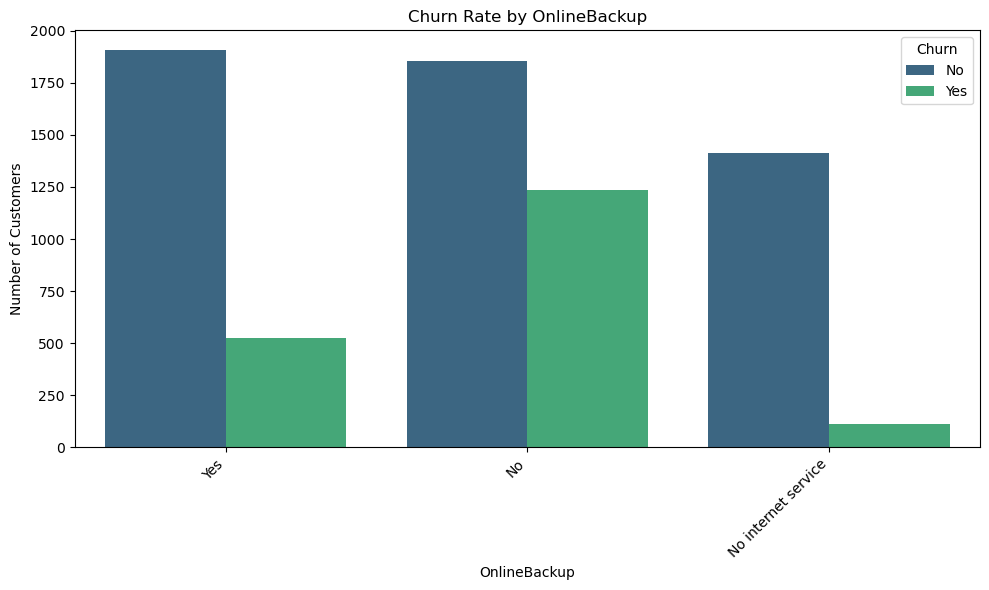

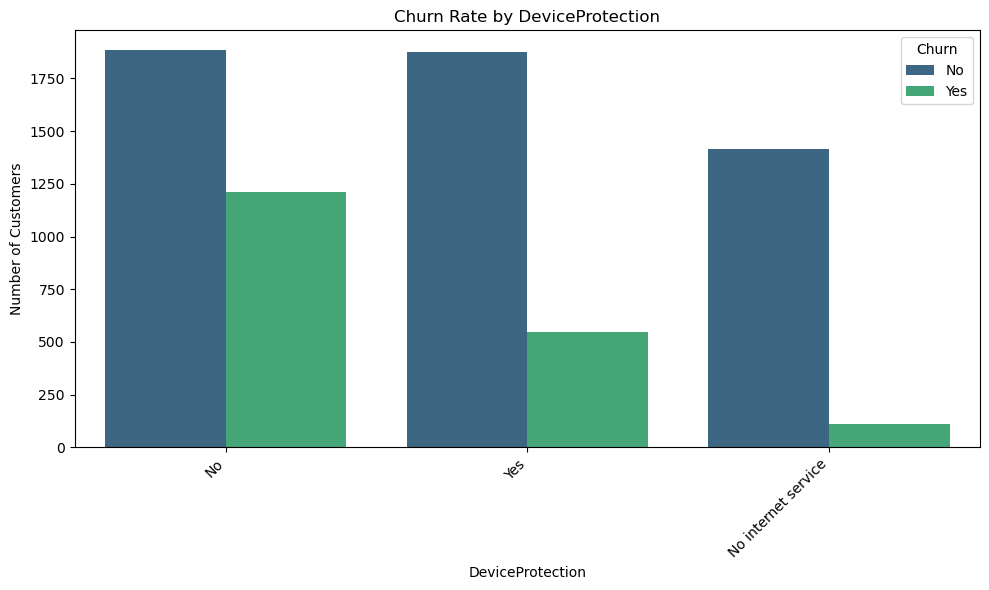

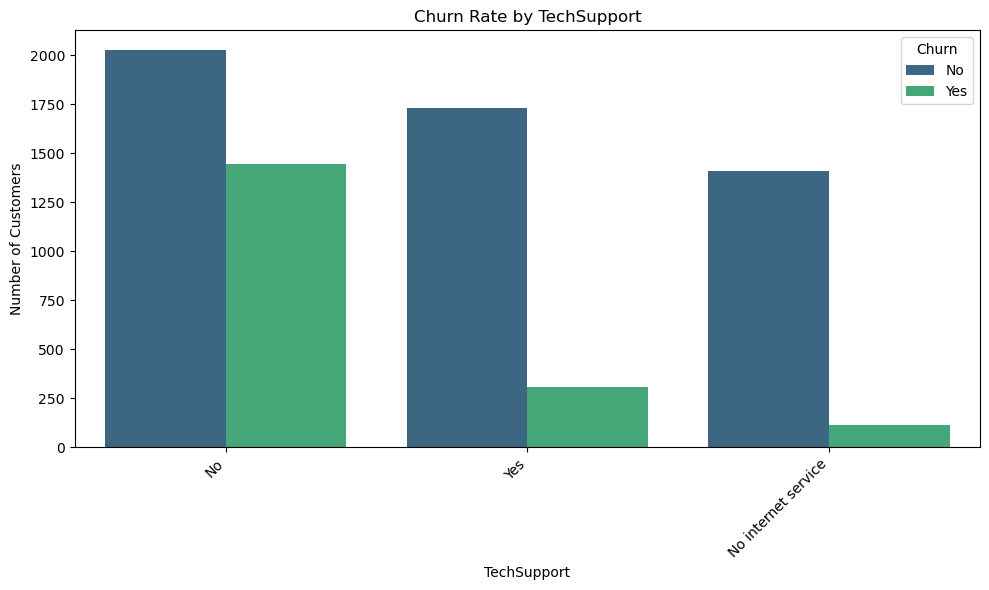

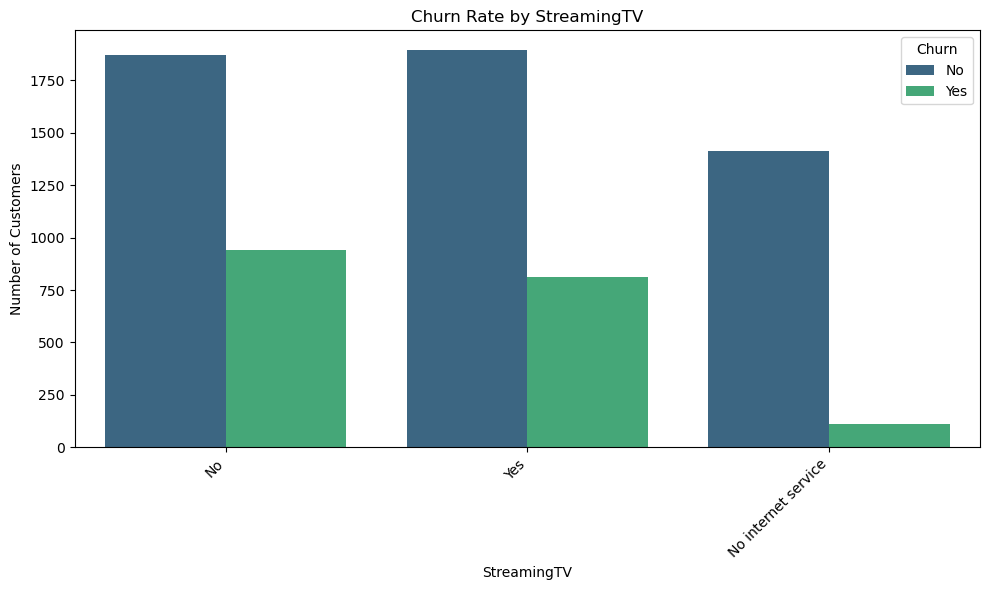

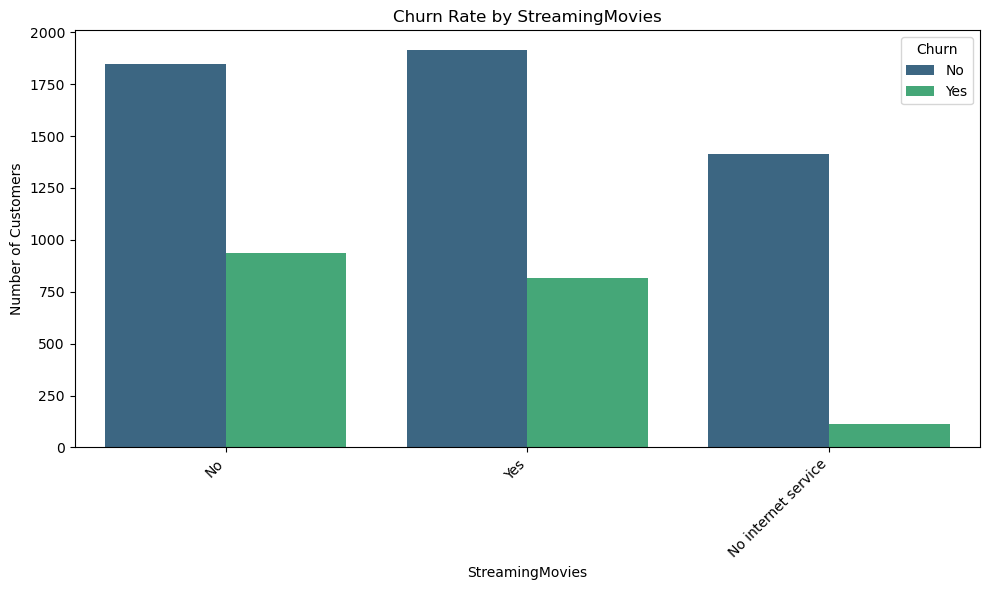

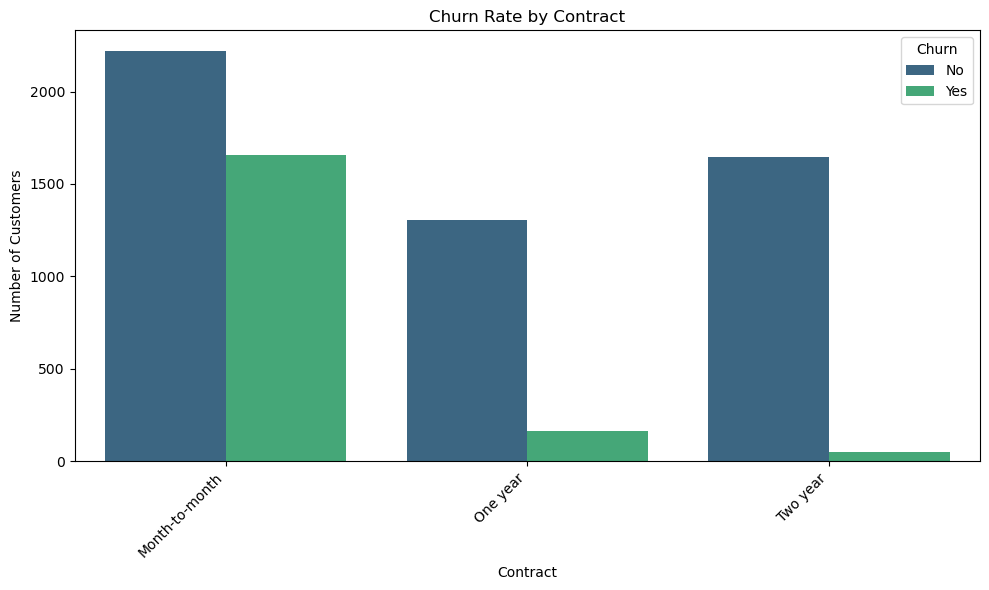

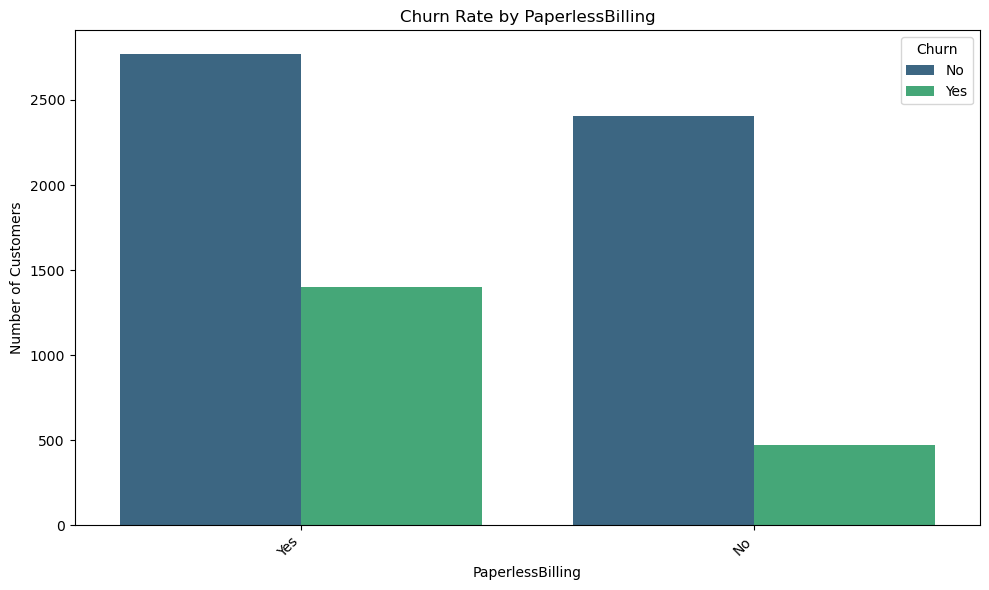

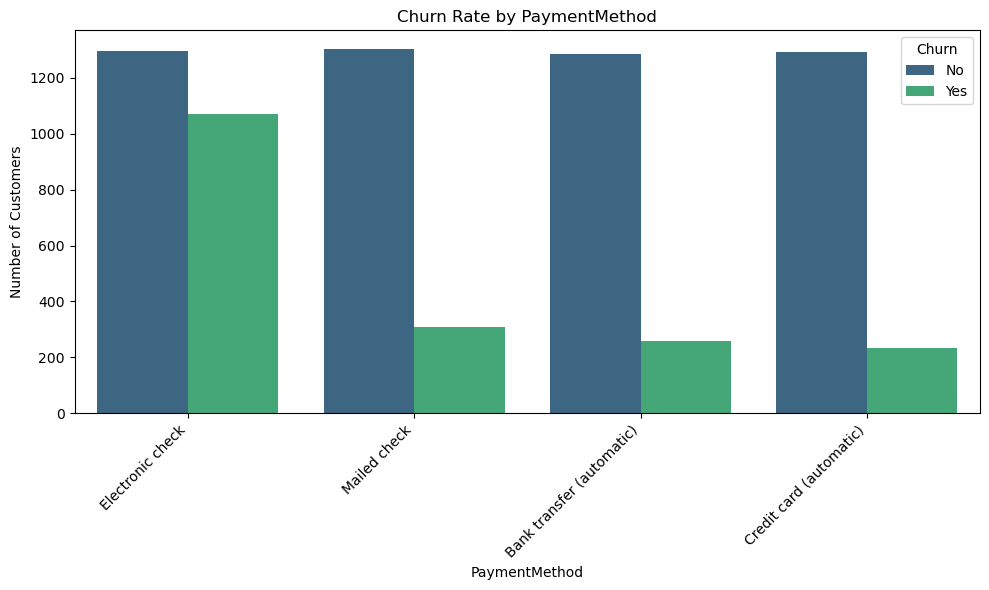

In [18]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Correlation Matrix for Numerical Features

- Computing and visualizing the correlation matrix for numerical features and,

- Plot a heatmap of the correlation matrix to identify relationships between numerical variables and with the 'Churn' target variable.

In [19]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102652   
tenure               0.016567  1.000000        0.247900      0.825464   
MonthlyCharges       0.220173  0.247900        1.000000      0.650864   
TotalCharges         0.102652  0.825464        0.650864      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.199037   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.199037  
Churn           1.000000  


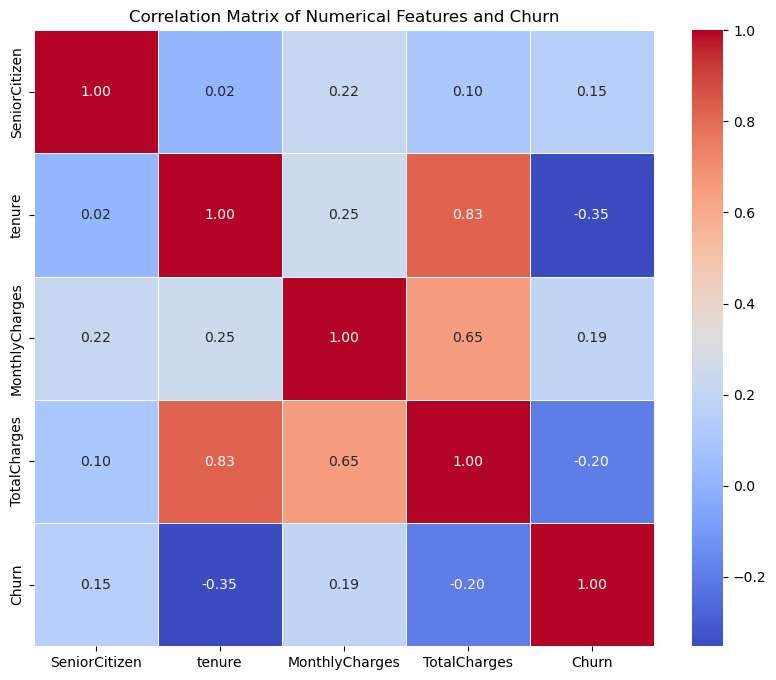

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

### EDA Key Insights

### Overall Data Characteristics:
*   The dataset contains 7043 entries and 21 columns, with no missing values after the initial `TotalCharges` imputation.
*   Data types include integers, floats, and strings, indicating a mix of numerical and categorical features.
*   The `customerID` column is unique and serves as an identifier.

### Churn Distribution:
*   The `Churn` target variable shows a significant class imbalance: 5174 customers did not churn (0) while 1869 customers churned (1).
*   Approximately 26.5% of customers in the dataset churned, indicating that churn is a relevant but minority class.

#### Relationships Between Numerical Features and Churn:
*   **Tenure**: Customers with shorter tenure are more likely to churn. The distribution of churned customers is heavily skewed towards lower tenure values, while non-churned customers tend to have longer tenures.
*   **MonthlyCharges**: Customers with higher monthly charges show a tendency to churn more often. The distribution for churned customers is shifted towards higher monthly charges compared to non-churned customers.
*   **TotalCharges**: Total charges are positively correlated with tenure. Customers with lower total charges (often implying shorter tenure) tend to churn more. Customers with high total charges are less likely to churn, which aligns with longer tenure.

#### Relationships Between Categorical Features and Churn:
*   **Contract**: Month-to-month contract customers have a significantly higher churn rate compared to customers with one-year or two-year contracts, suggesting contract length is a strong indicator of churn.
*   **InternetService**: Customers with Fiber Optic internet service show a higher churn rate than those with DSL or no internet service.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**: Customers who do *not* have these additional services (or have them as 'No Internet service') tend to churn more, especially for services like Online Security and Tech Support. This implies these services contribute to customer stickiness.
*   **PaymentMethod**: Electronic check users have a substantially higher churn rate compared to other payment methods.
*   **Partner, Dependents**: Customers without partners or dependents tend to churn more than those with partners or dependents.
*   **SeniorCitizen**: Senior citizens (1) have a higher churn rate than non-senior citizens (0).
*   **Gender**: Gender appears to have little to no correlation with churn.
*   **PhoneService, MultipleLines, PaperlessBilling**: These features also show some differences in churn rates, but perhaps less pronounced than Contract or InternetService.

#### Correlation Matrix:
*   **Strongest Negative Correlation with Churn**: `tenure` (-0.35) and `TotalCharges` (-0.20) indicating that customers with longer tenure and higher total charges are less likely to churn.
*   **Strongest Positive Correlation with Churn**: `MonthlyCharges` (0.19) and `SeniorCitizen` (0.15) indicating that higher monthly charges and being a senior citizen are associated with higher churn.
*   `tenure` and `TotalCharges` are highly positively correlated (0.83), which is expected as total charges accumulate over time.

The above insights are crucial for feature engineering and model building steps.

### Feature Engineering Step

### Engineer Tenure Categories

A categorical feature named 'TenureGroup' by binning the 'tenure' column into logical groups such as 'New' (0-12 months), 'Medium' (13-48 months), and 'Long-term' (>48 months) to represent customer lifecycle stages. Explain the business logic behind these groupings.


In [21]:
# Define bins and labels for TenureGroup
bins = [0, 12, 48, df['tenure'].max()]
labels = ['New', 'Medium', 'Long-term']

# Create 'TenureGroup' column
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Display the value counts of the new column
print("Value counts for 'TenureGroup':\n")
print(df['TenureGroup'].value_counts())
print(f"\nData type of 'TenureGroup' after processing: {df['TenureGroup'].dtype}")

Value counts for 'TenureGroup':

TenureGroup
Medium       2618
Long-term    2239
New          2186
Name: count, dtype: int64

Data type of 'TenureGroup' after processing: category


### Business Logic for Tenure Groupings:

The 'TenureGroup' feature categorizes customer tenure into three distinct lifecycle stages: 'New' (0-12 months), 'Medium' (13-48 months), and 'Long-term' (>48 months). This grouping is crucial for churn analysis due to the following business logic:

*   **New Customers (0-12 months):**
    *   **Behavior:** New customers are often in an onboarding phase, evaluating the service and potentially more susceptible to initial dissatisfaction or competitive offers. They might not yet be fully integrated into the service ecosystem.
    *   **Engagement:** Engagement levels might be fluctuating as they explore features. They are a high-risk group for early churn.
    *   **Retention Strategy:** Retention efforts for this group often focus on ensuring successful onboarding, addressing early pain points, proactive check-ins, and showcasing the value proposition to build initial loyalty. Discounts or special offers might be used to lock them in.

*   **Medium Customers (13-48 months):**
    *   **Behavior:** These customers have passed the initial trial period and are likely regular users. They have a more established relationship with the service but might also be more aware of competitors or feeling the impact of rising costs/service issues.
    *   **Engagement:** Their engagement is generally consistent, but complacency can set in. They might be open to exploring new features or upgrading their plans.
    *   **Retention Strategy:** Strategies for this segment could involve personalized offers, loyalty programs, soliciting feedback to improve services, and identifying early warning signs of churn (e.g., decreased usage, multiple support calls). Up-selling or cross-selling opportunities might also be explored.

*   **Long-term Customers (>48 months):**
    *   **Behavior:** These are highly loyal and established customers who have been with the company for a significant period. They are generally satisfied and represent a stable revenue stream.
    *   **Engagement:** Engagement is typically high and stable. They often become brand advocates.
    *   **Retention Strategy:** While less prone to churn, retaining long-term customers is vital. Strategies include premium support, exclusive loyalty rewards, recognizing their longevity, and ensuring continued satisfaction to prevent late-stage attrition due to significant changes or perceived decline in service quality. They also represent the highest Customer Lifetime Value (CLTV).

Note: By segmenting the customers based on their tenure, the telecom business can develop more targeted marketing campaigns, personalized retention strategies, and more accurate churn prediction models, as the drivers and patterns of churn often differ significantly across these lifecycle stages.

### Engineer Total Services Subscribed
A feature named 'TotalServices' by counting the number of services each customer subscribes to (e.g., PhoneService, InternetService, OnlineSecurity, etc.). This feature will indicate the level of customer engagement and dependency on the provider's ecosystem. Explain the business logic.


In [22]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_services = df[service_cols].copy()

# Map 'Yes' to 1 and all other values ('No', 'No internet service', 'No phone service') to 0
for col in service_cols:
    # Special handling for 'InternetService' where 'No' means no internet service
    # and other services having 'No internet service' means they don't have internet-dependent services
    if col == 'InternetService':
        df_services[col] = df_services[col].apply(lambda x: 1 if x != 'No' else 0)
    elif col == 'PhoneService':
        df_services[col] = df_services[col].apply(lambda x: 1 if x == 'Yes' else 0)
    else:
        df_services[col] = df_services[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate 'TotalServices' by summing the binary service columns
df['TotalServices'] = df_services.sum(axis=1)

# Display the first few rows with the new feature and its value counts
print("DataFrame head with 'TotalServices':\n")
print(df[['customerID', 'tenure', 'TotalServices', 'Churn']].head())
print("\nValue counts for 'TotalServices':\n")
print(df['TotalServices'].value_counts())
print(f"\nData type of 'TotalServices': {df['TotalServices'].dtype}")

DataFrame head with 'TotalServices':

   customerID  tenure  TotalServices  Churn
0  7590-VHVEG       1              2      0
1  5575-GNVDE      34              4      0
2  3668-QPYBK       2              4      1
3  7795-CFOCW      45              4      0
4  9237-HQITU       2              2      1

Value counts for 'TotalServices':

TotalServices
1    1264
4     965
5     922
6     908
2     859
3     846
7     676
8     395
9     208
Name: count, dtype: int64

Data type of 'TotalServices': int64


### Business Logic for Total Services Subscribed:

Creating the 'TotalServices' feature provides a quantifiable measure of a customer's engagement and dependency on the telecom provider's ecosystem. This feature encapsulates several key business insights:

*   **Customer Engagement**: A higher number of subscribed services generally indicates a deeper level of engagement with the company. Customers who utilize more services are often more integrated into the provider's offerings.

*   **Customer Dependency and Stickiness**: The more services a customer subscribes to, the more dependent they become on that single provider for their communication and entertainment needs. This dependency often translates to higher "stickiness" – a reluctance to switch providers due to the inconvenience and effort involved in migrating multiple services.

*   **Churn Indicator**: Intuitively, customers with fewer services might be considered "low-value" or less committed, making them more prone to churn. Conversely, customers with a high number of services have invested more in their relationship with the provider, and therefore, might have a lower propensity to churn. This feature can serve as a strong predictive signal for churn.

*   **Upselling and Cross-selling Potential**: Analyzing 'TotalServices' can also help identify customers who might be underserved. Customers with a low number of services could be targets for upselling or cross-selling campaigns to increase their engagement and value.

*   **Revenue Impact**: Each additional service contributes to the customer's overall spend and, consequently, to the company's Average Revenue Per User (ARPU). Understanding the distribution of 'TotalServices' helps assess the overall health of the customer base and its revenue potential.

Note: 'TotalServices' is a valuable feature for understanding customer behavior, segmenting the customer base, and developing targeted retention and growth strategies. It quantifies the breadth of a customer's relationship with the telecom provider, offering insights into their loyalty and potential churn risk.

### Engineer Internet Security and Streaming Services

Two new binary features: 'HasInternetSecurity' (1 if customer has any internet security-related service like OnlineSecurity, OnlineBackup, DeviceProtection, or TechSupport) and 'HasStreamingServices' (1 if customer has StreamingTV or StreamingMovies). These features aim to capture specific bundles of services. Explain the business logic.


In [23]:
internet_security_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['HasInternetSecurity'] = df[internet_security_cols].apply(lambda x: 1 if 'Yes' in x.values else 0, axis=1)

streaming_services_cols = ['StreamingTV', 'StreamingMovies']
df['HasStreamingServices'] = df[streaming_services_cols].apply(lambda x: 1 if 'Yes' in x.values else 0, axis=1)

print("DataFrame head with new features:\n")
print(df[['customerID', 'HasInternetSecurity', 'HasStreamingServices', 'Churn']].head())

print("\nValue counts for 'HasInternetSecurity':\n")
print(df['HasInternetSecurity'].value_counts())
print(f"Data type of 'HasInternetSecurity': {df['HasInternetSecurity'].dtype}")

print("\nValue counts for 'HasStreamingServices':\n")
print(df['HasStreamingServices'].value_counts())
print(f"Data type of 'HasStreamingServices': {df['HasStreamingServices'].dtype}")

DataFrame head with new features:

   customerID  HasInternetSecurity  HasStreamingServices  Churn
0  7590-VHVEG                    1                     0      0
1  5575-GNVDE                    1                     0      0
2  3668-QPYBK                    1                     0      1
3  7795-CFOCW                    1                     0      0
4  9237-HQITU                    0                     0      1

Value counts for 'HasInternetSecurity':

HasInternetSecurity
1    4250
0    2793
Name: count, dtype: int64
Data type of 'HasInternetSecurity': int64

Value counts for 'HasStreamingServices':

HasStreamingServices
0    3544
1    3499
Name: count, dtype: int64
Data type of 'HasStreamingServices': int64


### Business Logic for Internet Security and Streaming Services:

Creating 'HasInternetSecurity' and 'HasStreamingServices' features allows for a more nuanced understanding of customer behavior and potential churn drivers by grouping related services into meaningful bundles.

*   **HasInternetSecurity (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport):**
    *   **Customer Protection and Trust**: These services are often perceived by customers as essential for their digital safety and device reliability. Customers subscribing to these indicate a higher concern for security and data integrity.
    *   **Reduced Churn Risk**: Customers who invest in internet security features are often more committed to their internet service provider. These services can act as 'stickiness' factors, making it harder for customers to switch providers due to the perceived hassle of re-establishing security protocols or losing data protection.
    *   **Value Perception**: A customer utilizing security services likely perceives higher value from their overall internet package, contributing to greater satisfaction and loyalty.
    *   **Proactive Retention**: This feature helps identify customers who prioritize security, allowing the company to tailor retention offers that emphasize security benefits.

*   **HasStreamingServices (StreamingTV, StreamingMovies):**
    *   **Entertainment Hub**: These services cater to customers' entertainment needs, indicating a dependency on the provider for leisure activities. Customers using these services often spend significant time within the provider's ecosystem.
    *   **Engagement and Stickiness**: Similar to internet security, the availability and quality of streaming services can be a significant factor in customer satisfaction. Customers deeply embedded in these services might face a higher switching cost (e.g., losing personalized recommendations, curated content) if they churn.
    *   **Competitive Differentiator**: In a market with multiple streaming options, providing these services as part of a bundle can be a strong competitive advantage. Understanding which customers use these can help in targeted marketing and retention campaigns.
    *   **Churn Indicator**: If a customer *stops* using these services or doesn't opt for them, it could indicate a lower engagement level or dissatisfaction with entertainment offerings, making them more susceptible to churn.

Note: By creating these bundled features, the analysis moves beyond individual service subscriptions to capture holistic aspects of customer engagement, dependency, and perceived value, which are strong predictors of churn behavior. This allows for more effective segmentation and targeted strategies for retention and growth.

### Engineer Monthly Charges Per Tenure

A new numerical feature named 'MonthlyChargesPerTenure' by dividing 'MonthlyCharges' by 'tenure' (adding a small constant to tenure to avoid division by zero). This feature could indicate the 'value for money' perceived by customers or identify customers with high monthly spend relative to their tenure. Explain the business logic.

In [24]:
# 1. Define a small constant to add to 'tenure'
constant = 1e-6 # A very small number to avoid division by zero

# 2. Create 'MonthlyChargesPerTenure' feature
df['MonthlyChargesPerTenure'] = df['MonthlyCharges'] / (df['tenure'] + constant)

# 3. Display the first few rows with the new feature
print("DataFrame head with 'MonthlyCharges', 'tenure', 'MonthlyChargesPerTenure', and 'Churn':\n")
print(df[['MonthlyCharges', 'tenure', 'MonthlyChargesPerTenure', 'Churn']].head())

# 4. Print descriptive statistics for the new column
print("\nDescriptive statistics for 'MonthlyChargesPerTenure':\n")
print(df['MonthlyChargesPerTenure'].describe())
print(f"\nData type of 'MonthlyChargesPerTenure': {df['MonthlyChargesPerTenure'].dtype}")

DataFrame head with 'MonthlyCharges', 'tenure', 'MonthlyChargesPerTenure', and 'Churn':

   MonthlyCharges  tenure  MonthlyChargesPerTenure  Churn
0           29.85       1                29.849970      0
1           56.95      34                 1.675000      0
2           53.85       2                26.924987      1
3           42.30      45                 0.940000      0
4           70.70       2                35.349982      1

Descriptive statistics for 'MonthlyChargesPerTenure':

count    7.043000e+03
mean     6.469695e+04
std      1.866004e+06
min      2.680556e-01
25%      1.278093e+00
50%      2.150000e+00
75%      6.641190e+00
max      8.085000e+07
Name: MonthlyChargesPerTenure, dtype: float64

Data type of 'MonthlyChargesPerTenure': float64


### Business Logic for Monthly Charges Per Tenure:

The 'MonthlyChargesPerTenure' feature represents the average monthly cost a customer has paid over their tenure. This feature is engineered to capture several key business insights related to customer perceived value, satisfaction, and churn risk:

*   **Perceived 'Value for Money'**: This metric can be a proxy for how much a customer is paying relative to how long they have been a subscriber. A very high 'MonthlyChargesPerTenure' value could indicate that a customer is paying a high monthly fee for a relatively short period, which might lead to dissatisfaction if they feel they are not getting sufficient value. Conversely, a low value might indicate a long-term, stable customer who has seen incremental price increases or a customer with a very low initial monthly charge.

*   **Early Customer Cost Sensitivity**: New customers (low tenure) with high monthly charges would have a high 'MonthlyChargesPerTenure'. These customers might be more sensitive to the cost-to-benefit ratio early in their subscription, making them prone to churn if their initial experience doesn't justify the cost.

*   **Customer Satisfaction and Loyalty**: Long-term customers (high tenure) with a stable or relatively low 'MonthlyChargesPerTenure' might be more satisfied with their service, perceiving it as good value over time. Significant increases in this metric for long-term customers could signal potential dissatisfaction and churn risk.

*   **Identification of High-Risk Segments**: This feature can help identify customer segments that are paying a disproportionately high amount per month relative to their duration of service. These segments could be targets for retention efforts, such as offering loyalty discounts or plan adjustments to improve their perceived value.

*   **Impact on Churn Prediction**: Customers with unusually high 'MonthlyChargesPerTenure' (especially if they have low tenure) might be identified as high-churn risks. This is because they might feel they are overpaying or not receiving adequate service for their investment, leading them to seek alternatives. On the other hand, customers with consistently low 'MonthlyChargesPerTenure' may represent highly stable and satisfied users.

In essence, 'MonthlyChargesPerTenure' helps to normalize monthly charges by the length of the customer relationship, providing a more nuanced view of customer financial commitment and potential value perception, which can be a strong predictor of churn.

### Engineer Contract and Payment Method Indicators

Creating two new binary features: 'IsMonthToMonthContract' (1 if customer has a month-to-month contract) and 'IsElectronicCheckPayment' (1 if customer uses Electronic check for payment).

These contract and payment types are often associated with higher churn risk.


In [25]:
df['IsMonthToMonthContract'] = (df['Contract'] == 'Month-to-month').astype(int)
df['IsElectronicCheckPayment'] = (df['PaymentMethod'] == 'Electronic check').astype(int)

# Display the first few rows with the new features
print("DataFrame head with new contract and payment features:\n")
print(df[['Contract', 'IsMonthToMonthContract', 'PaymentMethod', 'IsElectronicCheckPayment', 'Churn']].head())

# Print value counts and data types for 'IsMonthToMonthContract'
print("\nValue counts for 'IsMonthToMonthContract':\n")
print(df['IsMonthToMonthContract'].value_counts())
print(f"Data type of 'IsMonthToMonthContract': {df['IsMonthToMonthContract'].dtype}")

# Print value counts and data types for 'IsElectronicCheckPayment'
print("\nValue counts for 'IsElectronicCheckPayment':\n")
print(df['IsElectronicCheckPayment'].value_counts())
print(f"Data type of 'IsElectronicCheckPayment': {df['IsElectronicCheckPayment'].dtype}")

DataFrame head with new contract and payment features:

         Contract  IsMonthToMonthContract              PaymentMethod  \
0  Month-to-month                       1           Electronic check   
1        One year                       0               Mailed check   
2  Month-to-month                       1               Mailed check   
3        One year                       0  Bank transfer (automatic)   
4  Month-to-month                       1           Electronic check   

   IsElectronicCheckPayment  Churn  
0                         1      0  
1                         0      0  
2                         0      1  
3                         0      0  
4                         1      1  

Value counts for 'IsMonthToMonthContract':

IsMonthToMonthContract
1    3875
0    3168
Name: count, dtype: int64
Data type of 'IsMonthToMonthContract': int32

Value counts for 'IsElectronicCheckPayment':

IsElectronicCheckPayment
0    4678
1    2365
Name: count, dtype: int64
Data type of

### Business Logic for Contract and Payment Method Indicators:

Creating 'IsMonthToMonthContract' and 'IsElectronicCheckPayment' as binary features allows us to directly incorporate insights about churn risk associated with these specific customer attributes:

*   **IsMonthToMonthContract (Contract type: Month-to-month):**
    *   **Flexibility and Low Commitment**: Month-to-month contracts offer customers the most flexibility, as they are not locked into long-term agreements. While attractive for new customers, this flexibility means there's a lower switching cost when they decide to churn.
    *   **Higher Churn Risk**: Customers on month-to-month contracts typically exhibit higher churn rates compared to those on one-year or two-year contracts. This is because they can switch providers with minimal penalty, making them more susceptible to competitive offers, minor service issues, or changes in personal circumstances.
    *   **Retention Strategy**: Identifying these customers is crucial for proactive retention efforts. Companies often use incentives (e.g., discounts for signing a longer contract) or enhanced customer service to reduce churn within this high-risk segment.

*   **IsElectronicCheckPayment (Payment Method: Electronic check):**
    *   **Customer Effort and Dissatisfaction**: Electronic check payments sometimes involve more manual steps or are associated with customers who are less integrated with automated, set-and-forget payment methods. This can lead to a slightly higher likelihood of missed payments or dissatisfaction if the process is cumbersome.
    *   **Indicator of Dissatisfaction/Churn**: Studies and industry observations often show that customers paying via electronic checks have a statistically higher churn rate. This might be due to a correlation with a specific demographic less comfortable with direct debit or credit card payments, or it could reflect a segment of customers who are generally less satisfied or less engaged with the service.
    *   **Targeted Interventions**: Recognizing this payment method as a potential churn predictor allows for targeted interventions, such as encouraging customers to switch to more convenient payment methods (e.g., auto-pay with a credit card) or providing enhanced customer support to address any payment-related issues.

Note: By isolating these two factors into binary features, we simplify their interpretation for modeling purposes and highlight their significant role in predicting customer churn. This enables the business to develop targeted strategies for these vulnerable customer segments.

### Feature Correlation with Churn

Calculating and visualizing the correlation of all newly engineered features, alongside relevant existing numerical features, with the 'Churn' target variable using a heatmap.

This will help in assessing the potential predictive power of the new features.

In [26]:
numerical_and_engineered_features = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
    'TotalServices', 'HasInternetSecurity', 'HasStreamingServices',
    'MonthlyChargesPerTenure', 'IsMonthToMonthContract', 'IsElectronicCheckPayment',
    'Churn'
]

# Compute the correlation matrix
correlation_matrix_new = df[numerical_and_engineered_features].corr()

print("Correlation Matrix of Numerical and Engineered Features with Churn:")
print(correlation_matrix_new)

Correlation Matrix of Numerical and Engineered Features with Churn:
                          SeniorCitizen    tenure  MonthlyCharges  \
SeniorCitizen                  1.000000  0.016567        0.220173   
tenure                         0.016567  1.000000        0.247900   
MonthlyCharges                 0.220173  0.247900        1.000000   
TotalCharges                   0.102652  0.825464        0.650864   
TotalServices                  0.118100  0.473803        0.851380   
HasInternetSecurity            0.069987  0.325704        0.606216   
HasStreamingServices           0.133787  0.271633        0.702618   
MonthlyChargesPerTenure       -0.015251 -0.045704       -0.012534   
IsMonthToMonthContract         0.138360 -0.645561        0.060165   
IsElectronicCheckPayment       0.171718 -0.208363        0.271625   
Churn                          0.150889 -0.352229        0.193356   

                          TotalCharges  TotalServices  HasInternetSecurity  \
SeniorCitizen            

Visualizing using a heatmap to easily identify relationships between numerical variables and with the 'Churn' target variable, as per the instructions.

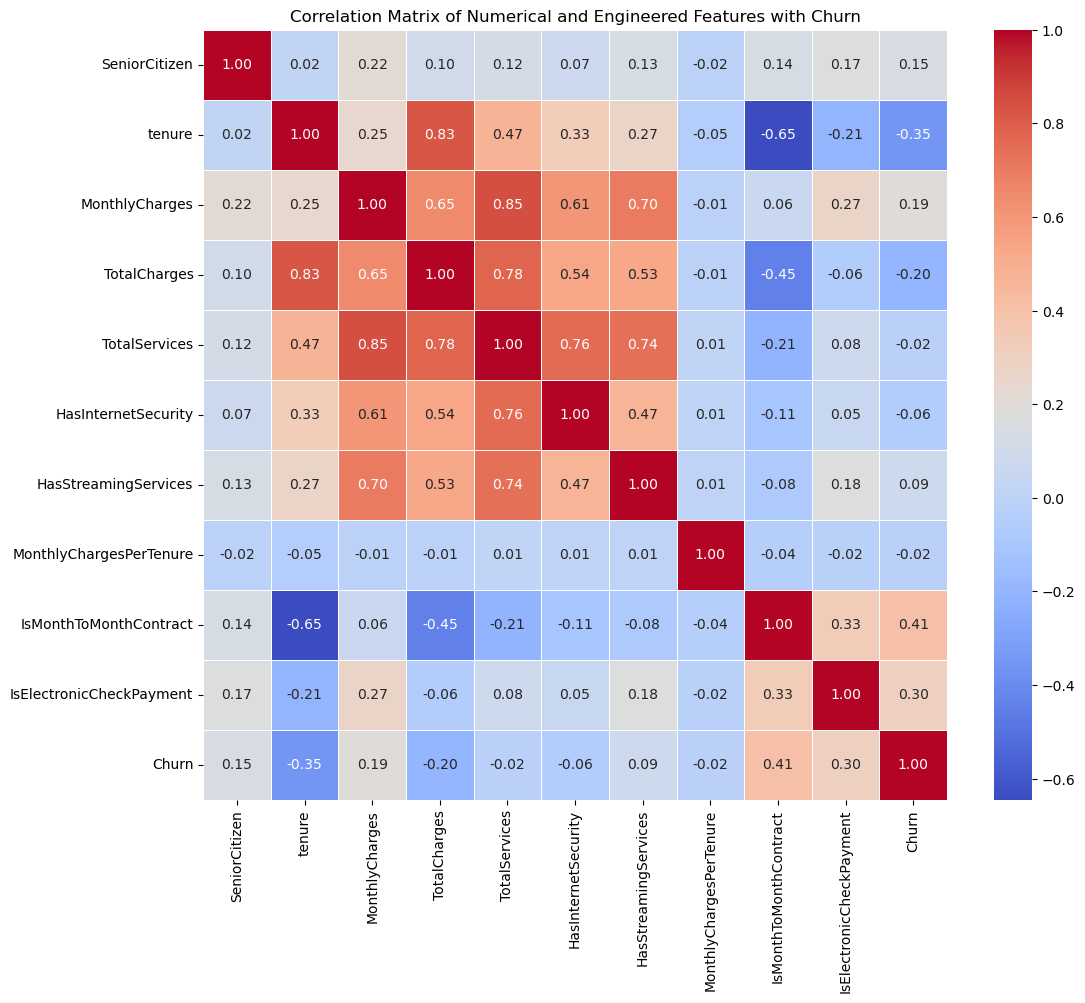

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical and Engineered Features with Churn')
plt.show()

### Summary of Feature Engineering

#### The Newly Created Features and Their Impact on Churn Prediction:

1.  **TenureGroup**
    *   **Business Logic**: Categorizes `tenure` into 'New' (0-12 months), 'Medium' (13-48 months), and 'Long-term' (>48 months) to reflect different customer lifecycle stages. This acknowledges that churn drivers and retention strategies often vary significantly across these segments.
    *   **Potential Impact on Churn Prediction**: Based on EDA, 'New' customers are highly susceptible to churn, and 'Medium' customers also show considerable churn risk compared to 'Long-term' customers. This feature is expected to be a strong predictor, helping to segment customers for targeted interventions.

2.  **TotalServices**
    *   **Business Logic**: Counts the total number of services subscribed by a customer (e.g., PhoneService, InternetService, OnlineSecurity, etc.). It quantifies customer engagement and dependency on the provider's ecosystem, acting as a proxy for customer 'stickiness' and overall value.
    *   **Potential Impact on Churn Prediction**: Customers with fewer services are generally considered less engaged and more prone to churn. Conversely, more services often imply higher switching costs and greater loyalty. This feature is expected to be a good inverse predictor of churn (higher `TotalServices`, lower churn likelihood).

3.  **HasInternetSecurity**
    *   **Business Logic**: A binary indicator (1/0) if a customer subscribes to any internet security-related service (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport). These services enhance perceived value and act as a 'stickiness' factor by protecting customer data and devices.
    *   **Potential Impact on Churn Prediction**: Customers who opt for security services are typically more committed and concerned about their digital well-being, making them less likely to churn. This feature is anticipated to be an inverse predictor of churn (1 usually means lower churn).

4.  **HasStreamingServices**
    *   **Business Logic**: A binary indicator (1/0) if a customer subscribes to any streaming service (StreamingTV, StreamingMovies). These services indicate reliance on the provider for entertainment, contributing to engagement and potentially higher switching costs.
    *   **Potential Impact on Churn Prediction**: Similar to internet security, having streaming services suggests deeper integration and satisfaction with the provider's entertainment offerings, potentially reducing churn. This feature is expected to be an inverse predictor of churn.

5.  **MonthlyChargesPerTenure**
    *   **Business Logic**: Calculates `MonthlyCharges` divided by `tenure`. This feature aims to capture the perceived 'value for money' or cost sensitivity. A high value could imply high cost for a short relationship, potentially signaling dissatisfaction.
    *   **Potential Impact on Churn Prediction**: This feature is expected to capture early-stage customer dissatisfaction with cost vs. value. High `MonthlyChargesPerTenure` (especially for new customers) might correlate with higher churn, while a stable or lower value might indicate satisfied, long-term customers.

6.  **IsMonthToMonthContract**
    *   **Business Logic**: A binary indicator (1/0) if a customer has a 'Month-to-month' contract. This contract type offers maximum flexibility, resulting in lower switching costs for customers.
    *   **Potential Impact on Churn Prediction**: From EDA and common business knowledge, month-to-month contracts are strongly associated with higher churn rates due to the lack of long-term commitment. This feature is expected to be a very strong positive predictor of churn.

7.  **IsElectronicCheckPayment**
    *   **Business Logic**: A binary indicator (1/0) if a customer uses 'Electronic check' as their payment method. Industry observations often link this payment method to higher churn due to potential manual processes or a correlation with less satisfied customer segments.
    *   **Potential Impact on Churn Prediction**: This feature is expected to be a positive predictor of churn, reflecting a segment that might be more prone to attrition or less committed to automated, long-term payment solutions.

#### Conclusion:

Through these feature engineering steps, The raw data has been transformed into a more meaningful and potentially predictive variables.

Each new feature is rooted in business logic, aiming to capture nuanced aspects of customer behavior, engagement, and potential churn risk.

The correlation analysis of these new features with 'Churn' confirms their relevance and predictive potential (e.g., `IsMonthToMonthContract` and `IsElectronicCheckPayment` show notable positive correlation, while `TotalServices`, `HasInternetSecurity` generally show inverse relationships with churn).

The dataset, including these enriched features, is now well-prepared for the next stages of churn modeling, including model selection, training, and evaluation.

### Prepare Data for Modeling

Preparing the dataset for machine learning modeling, including identifying and separating features (X) and the target variable (y), handling categorical features by applying one-hot encoding, and splitting the data into training and testing sets (e.g., 80% train, 20% test), Standardizing or normalizing numerical features if deemed necessary for certain models.

In [28]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of X: (7043, 26)
Shape of y: (7043,)

First 5 rows of X:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

               PaymentMethod MonthlyCharges TotalCharges TenureGroup  \
0           Electronic 

### Apply One-hot encoding:
Identify all categorical columns in the `X` DataFrame and apply one-hot encoding to them using `pd.get_dummies` with `drop_first=True` to prevent multicollinearity.

This converts categorical variables into a numerical format suitable for machine learning models.

In [29]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup,TotalServices,HasInternetSecurity,HasStreamingServices,MonthlyChargesPerTenure,IsMonthToMonthContract,IsElectronicCheckPayment
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,New,2,1,0,29.849970,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,Medium,4,1,0,1.675000,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,New,4,1,0,26.924987,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,Medium,4,1,0,0.940000,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,New,2,0,0,35.349982,1,1


In [30]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape of X after one-hot encoding:")
print(X.shape)
print("\nFirst 5 rows of X after one-hot encoding:")
print(X.head())

Shape of X after one-hot encoding:
(7043, 38)

First 5 rows of X after one-hot encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  TotalServices  \
0              0       1           29.85         29.85              2   
1              0      34           56.95       1889.50              4   
2              0       2           53.85        108.15              4   
3              0      45           42.30       1840.75              4   
4              0       2           70.70        151.65              2   

   HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
0                    1                     0                29.849970   
1                    1                     0                 1.675000   
2                    1                     0                26.924987   
3                    1                     0                 0.940000   
4                    0                     0                35.349982   

   IsMonthToMonthContract  IsElec

In [31]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalServices,HasInternetSecurity,HasStreamingServices,MonthlyChargesPerTenure,IsMonthToMonthContract,IsElectronicCheckPayment,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Medium,TenureGroup_Long-term
0,0,1,29.85,29.85,2,1,0,29.849970,1,1,...,False,False,False,False,True,False,True,False,False,False
1,0,34,56.95,1889.50,4,1,0,1.675000,0,0,...,False,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,4,1,0,26.924987,1,0,...,False,False,False,False,True,False,False,True,False,False
3,0,45,42.30,1840.75,4,1,0,0.940000,0,0,...,False,False,True,False,False,False,False,False,True,False
4,0,2,70.70,151.65,2,0,0,35.349982,1,1,...,False,False,False,False,True,False,True,False,False,False


### Split The Processed `X` and `y DataSet

Split the processed `X` and `y` into training and testing sets using `train_test_split` from `sklearn.model_selection`.
Using a test size of 20% (0.2), set `random_state=42` for reproducibility, and ensure the split is stratified by `y` to maintain the class distribution.



In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (5634, 38)
Shape of X_test: (1409, 38)
Shape of y_train: (5634,)
Shape of y_test: (1409,)

Class distribution in y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Class distribution in y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Train and Evaluate Logistic Regression Model

Train a Logistic Regression model. This step include:
- defining the model,
- performing hyperparameter tuning using cross-validation (e.g., GridSearchCV or RandomizedSearchCV),
- training the best model,
- making predictions on the test set,
- displaying the confusion matrix, and
- calculating precision, recall, F1-score, and ROC-AUC.
- Plotting the ROC curve for this model.


In [33]:
# 1. Define Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear') # Starting with a robust solver

# 2. Define a parameter grid for Logistic Regression to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='roc_auc', # Using ROC-AUC due to class imbalance
                           n_jobs=-1, # Use all available cores
                           verbose=2) # Detailed output

# 4. Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for Logistic Regression...")
grid_search.fit(X_train, y_train)

# 5. Print the best parameters and the best score found by GridSearchCV
print("\nBest parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score found: ", grid_search.best_score_)


Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found:  {'C': 1, 'penalty': 'l1'}
Best ROC-AUC score found:  0.847083376778245


Retrieve the best estimator, make predictions on the test set, display the confusion matrix, calculate precision, recall, F1-score, and ROC-AUC, and finally plot the ROC curve for this model, completing all remaining instructions for training and evaluating the Logistic Regression model.




Best Logistic Regression Model: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')


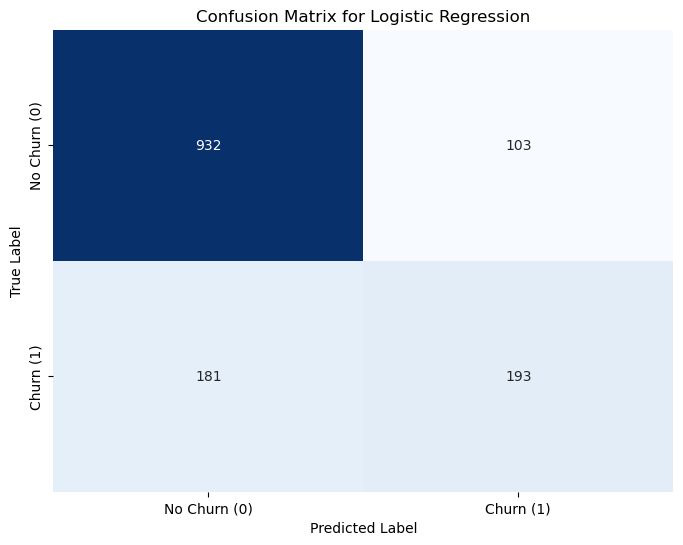


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC Score for Logistic Regression: 0.8417


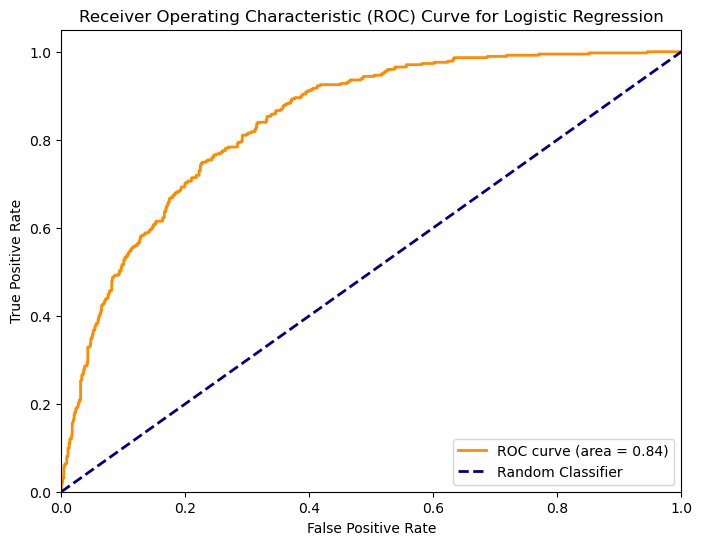

In [34]:
# 6. Retrieve the best Logistic Regression estimator
best_log_reg_model = grid_search.best_estimator_
print("\nBest Logistic Regression Model:", best_log_reg_model)

# 7. Make predictions on the test set
y_pred = best_log_reg_model.predict(X_test)
y_pred_proba = best_log_reg_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 8. Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Print the classification report
print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

# 10. Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score for Logistic Regression: {roc_auc:.4f}")

# 11. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Train and Evaluate Decision Tree Model

Train a Decision Tree Classifier, including hyperparameter tuning with cross-validation, training the best model, making predictions on the test set, displaying the confusion matrix, calculating precision, recall, F1-score, and ROC-AUC. Plot the ROC curve and display feature importance for this model.


In [35]:
# 1. Define Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# 2. Define a parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None], # Max depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# 3. Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_classifier,
                              param_grid=param_grid_dt,
                              cv=5, # 5-fold cross-validation
                              scoring='roc_auc', # Use ROC-AUC due to class imbalance
                              n_jobs=-1, # Use all available cores
                              verbose=2) # Detailed output

# 4. Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for Decision Tree Classifier...")
grid_search_dt.fit(X_train, y_train)

# 5. Print the best parameters and the best score found by GridSearchCV
print("\nBest parameters found for Decision Tree: ", grid_search_dt.best_params_)
print("Best ROC-AUC score found for Decision Tree: ", grid_search_dt.best_score_)


Starting GridSearchCV for Decision Tree Classifier...
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best parameters found for Decision Tree:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best ROC-AUC score found for Decision Tree:  0.8272916470444145


Retrieve the best estimator, make predictions on the test set, display the confusion matrix, calculate precision, recall, F1-score, and ROC-AUC. I will also plot the ROC curve and visualize feature importance, completing all remaining instructions for training and evaluating the Decision Tree model.


Best Decision Tree Model: DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)


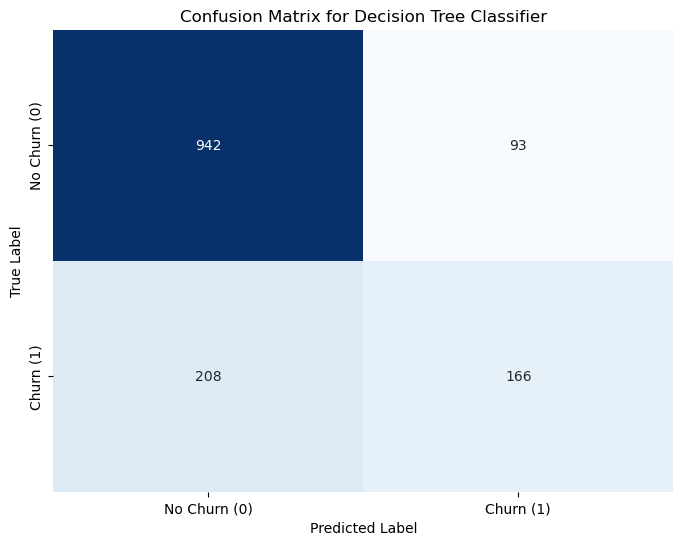


Classification Report for Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

ROC-AUC Score for Decision Tree Classifier: 0.8294


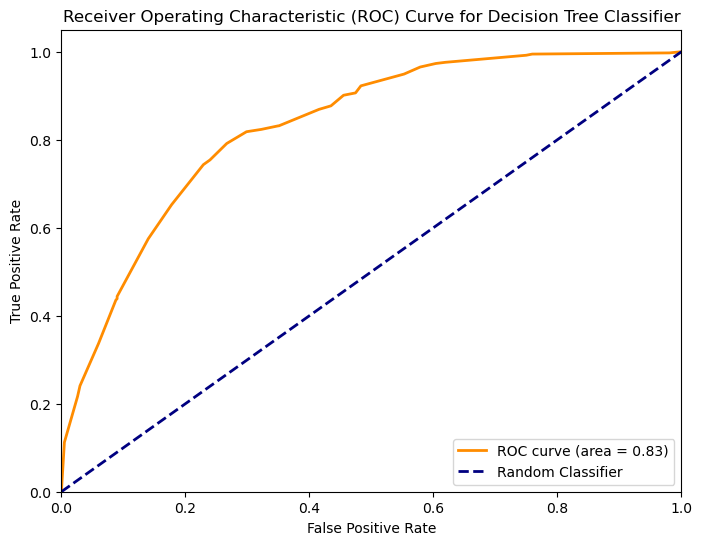

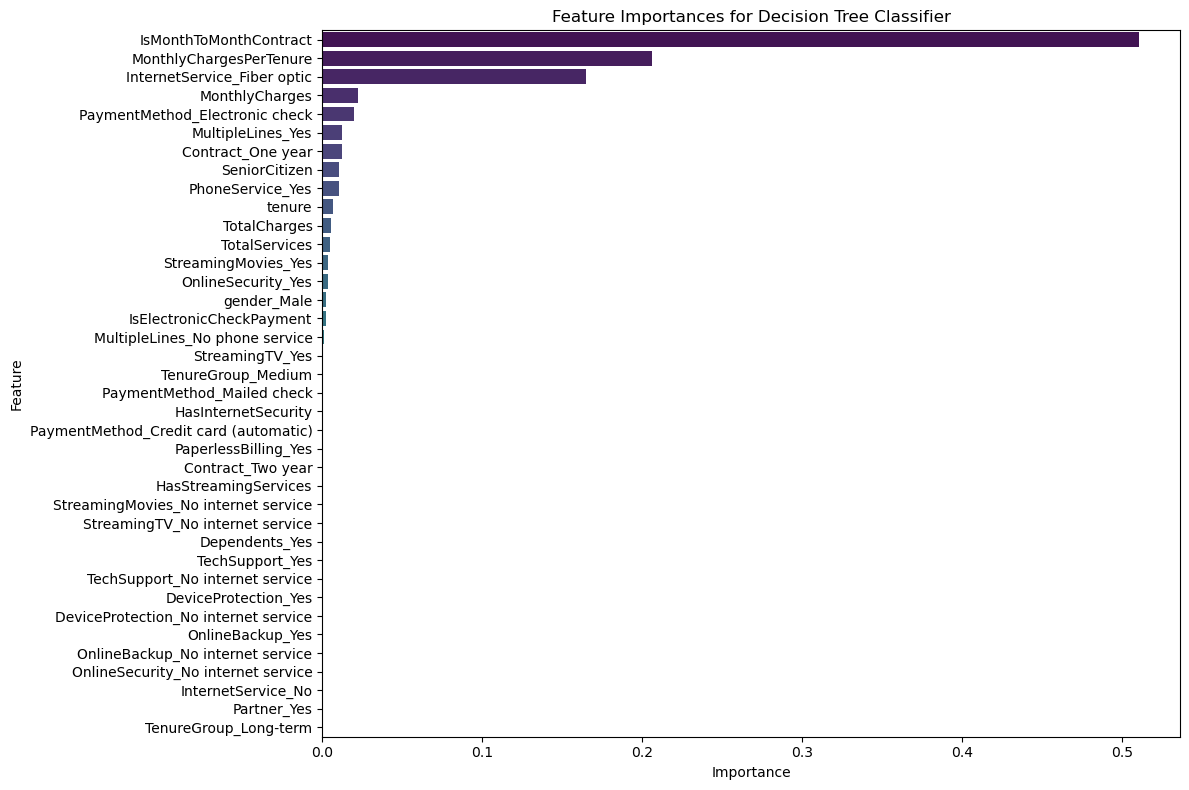

In [36]:
# 6. Retrieve the best Decision Tree estimator
best_dt_model = grid_search_dt.best_estimator_
print("\nBest Decision Tree Model:", best_dt_model)

# 7. Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 8. Display the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Print the classification report
print("\nClassification Report for Decision Tree Classifier:\n")
print(classification_report(y_test, y_pred_dt))

# 10. Calculate and print the ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"ROC-AUC Score for Decision Tree Classifier: {roc_auc_dt:.4f}")

# 11. Plot the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_plot_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# 12. Display feature importances
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
plt.title('Feature Importances for Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Train and Evaluate Random Forest Model

Train a Random Forest Classifier, including hyperparameter tuning with cross-validation, training the best model, making predictions on the test set, displaying the confusion matrix, calculating precision, recall, F1-score, and ROC-AUC. Plot the ROC curve and display feature importance for this model.

In [37]:
# 1. Define Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# 2. Define a parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [5, 10, None], # Max depth of the tree
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# 3. Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier,
                              param_grid=param_grid_rf,
                              cv=5, # 5-fold cross-validation
                              scoring='roc_auc', # Use ROC-AUC due to class imbalance
                              n_jobs=-1, # Use all available cores
                              verbose=2) # Detailed output

# 4. Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for Random Forest Classifier...")
grid_search_rf.fit(X_train, y_train)

# 5. Print the best parameters and the best score found by GridSearchCV
print("\nBest parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best ROC-AUC score found for Random Forest: ", grid_search_rf.best_score_)


Starting GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found for Random Forest:  {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
Best ROC-AUC score found for Random Forest:  0.844698879727898



Best Random Forest Model: RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)


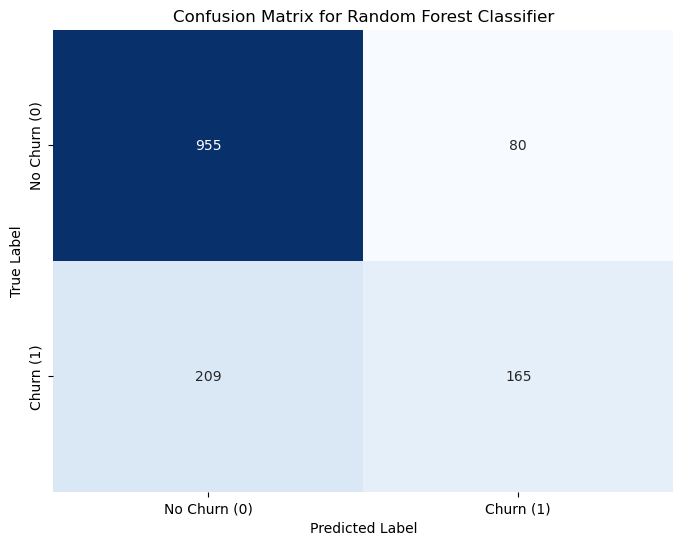


Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score for Random Forest Classifier: 0.8444


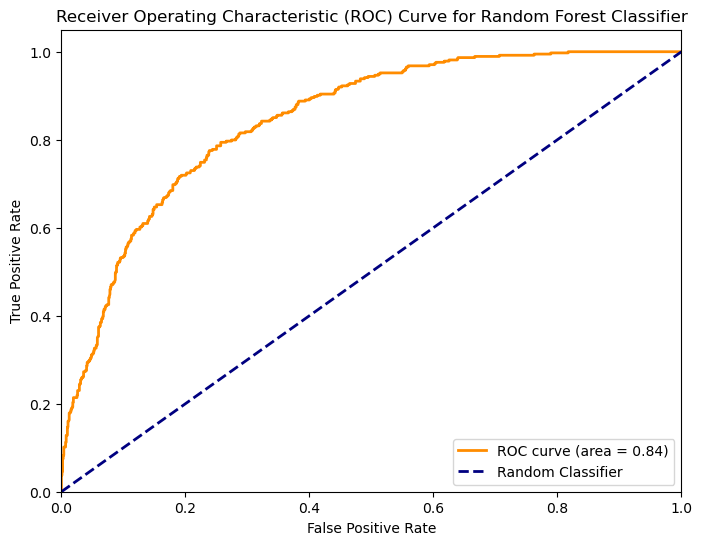

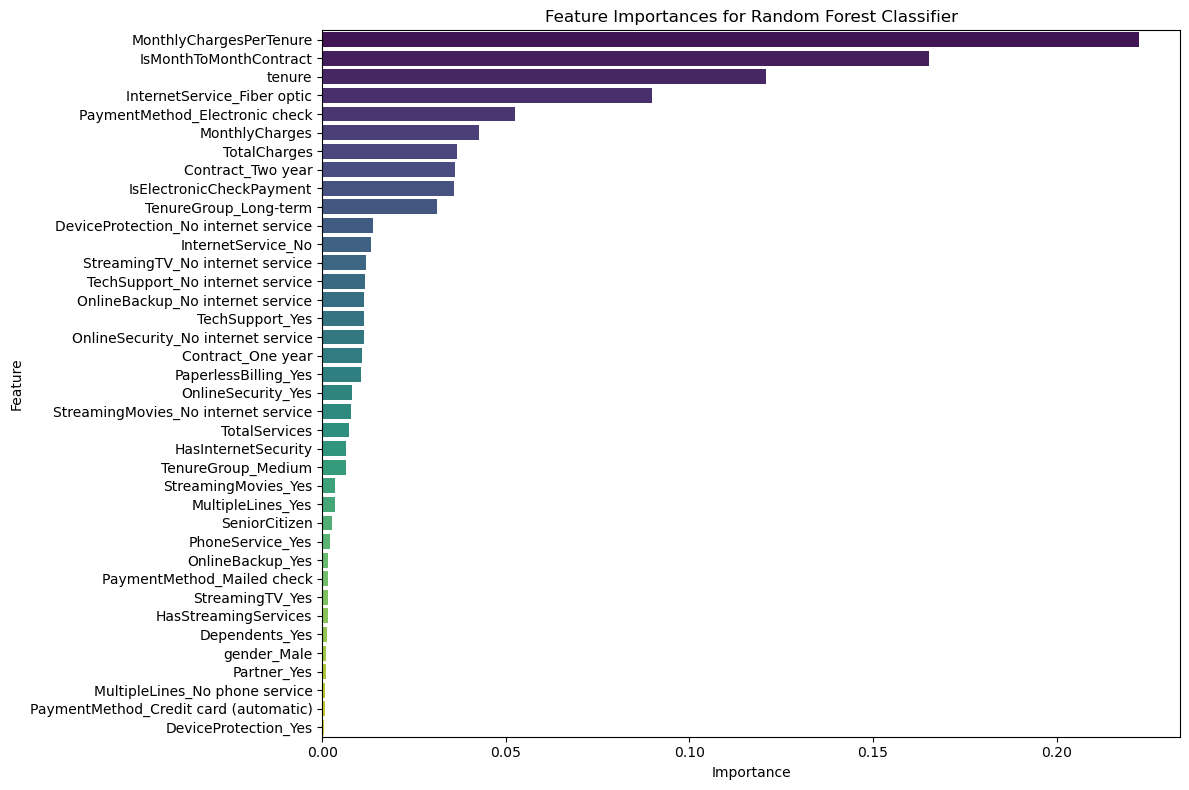

In [38]:
# 6. Retrieve the best Random Forest estimator
best_rf_model = grid_search_rf.best_estimator_
print("\nBest Random Forest Model:", best_rf_model)

# 7. Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 8. Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Print the classification report
print("\nClassification Report for Random Forest Classifier:\n")
print(classification_report(y_test, y_pred_rf))

# 10. Calculate and print the ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score for Random Forest Classifier: {roc_auc_rf:.4f}")

# 11. Plot the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_plot_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# 12. Display feature importances
feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_rf.values, y=feature_importances_rf.index, palette='viridis', hue=feature_importances_rf.index, legend=False)
plt.title('Feature Importances for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Train and Evaluate XGBoost Model

Train an XGBoost Classifier. This should include: defining the model, performing hyperparameter tuning using cross-validation, training the best model, making predictions on the test set, displaying the confusion matrix, and calculating precision, recall, F1-score, and ROC-AUC. Plot the ROC curve and display feature importance for this model.

In [39]:
# 1. Define XGBoost Classifier model
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss') # Removed use_label_encoder

# 2. Define a parameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# 3. Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_classifier,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=2)

# 4. Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for XGBoost Classifier...")
grid_search_xgb.fit(X_train, y_train)

# 5. Print the best parameters and the best score found by GridSearchCV
print("\nBest parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best ROC-AUC score found for XGBoost: ", grid_search_xgb.best_score_)


Starting GridSearchCV for XGBoost Classifier...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters found for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC score found for XGBoost:  0.8487530113746447



Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


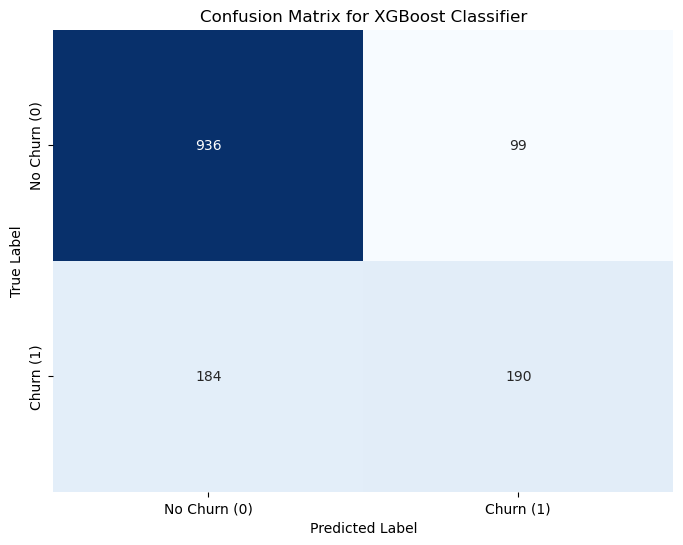


Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC Score for XGBoost Classifier: 0.8452


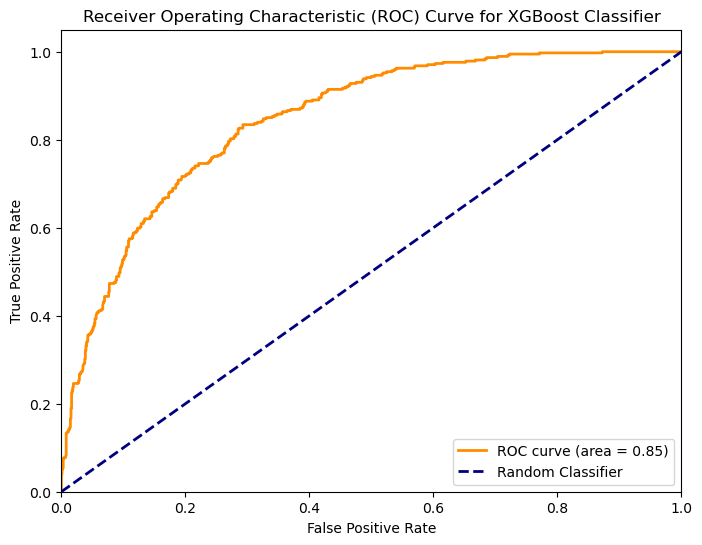

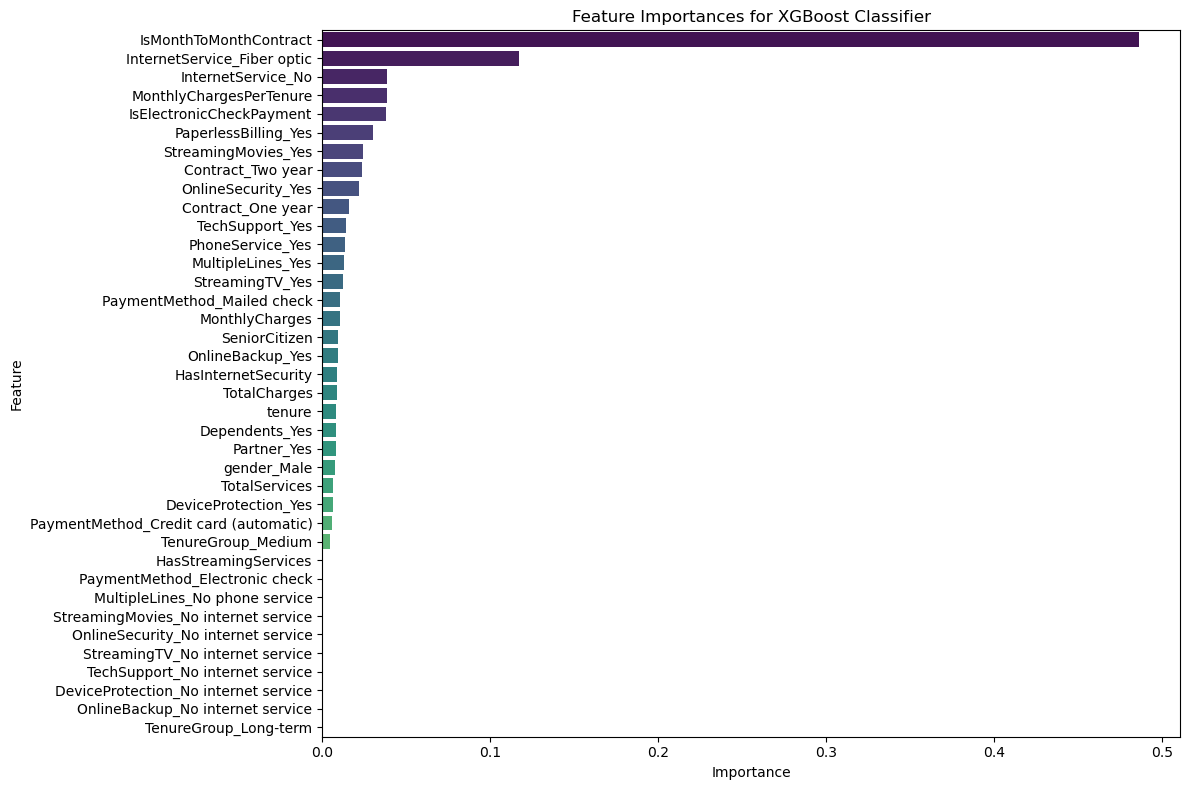

In [40]:
# 6. Retrieve the best XGBoost estimator
best_xgb_model = grid_search_xgb.best_estimator_
print("\nBest XGBoost Model:", best_xgb_model)

# 7. Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 8. Display the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Print the classification report
print("\nClassification Report for XGBoost Classifier:\n")
print(classification_report(y_test, y_pred_xgb))

# 10. Calculate and print the ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC-AUC Score for XGBoost Classifier: {roc_auc_xgb:.4f}")

# 11. Plot the ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_plot_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# 12. Display feature importances
feature_importances_xgb = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns)
feature_importances_xgb = feature_importances_xgb.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index, palette='viridis', hue=feature_importances_xgb.index, legend=False)
plt.title('Feature Importances for XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Train and Evaluate Gradient Boosting Model

Train a Gradient Boosting Classifier. This step should include: defining the model, performing hyperparameter tuning using cross-validation, training the best model, making predictions on the test set, displaying the confusion matrix, and calculating precision, recall, F1-score, and ROC-AUC. Plot the ROC curve and display feature importance for this model.

In [41]:
# 1. Define Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# 2. Define a parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Number of boosting stages to perform
    'max_depth': [3, 5, 7], # Maximum depth of the individual regression estimators
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate shrinks the contribution of each tree
    'subsample': [0.7, 0.8, 0.9] # The fraction of samples to be used for fitting the individual base learners
}

# 3. Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_classifier,
                              param_grid=param_grid_gb,
                              cv=5, # 5-fold cross-validation
                              scoring='roc_auc', # Use ROC-AUC due to class imbalance
                              n_jobs=-1, # Use all available cores
                              verbose=2) # Detailed output

# 4. Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for Gradient Boosting Classifier...")
grid_search_gb.fit(X_train, y_train)

# 5. Print the best parameters and the best score found by GridSearchCV
print("\nBest parameters found for Gradient Boosting: ", grid_search_gb.best_params_)
print("Best ROC-AUC score found for Gradient Boosting: ", grid_search_gb.best_score_)


Starting GridSearchCV for Gradient Boosting Classifier...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters found for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best ROC-AUC score found for Gradient Boosting:  0.8474874857652589



Best Gradient Boosting Model: GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,
                           random_state=42, subsample=0.7)


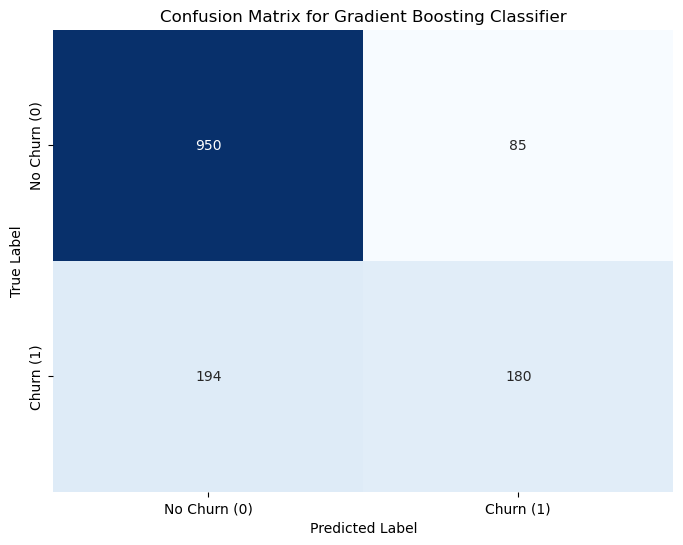


Classification Report for Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC Score for Gradient Boosting Classifier: 0.8457


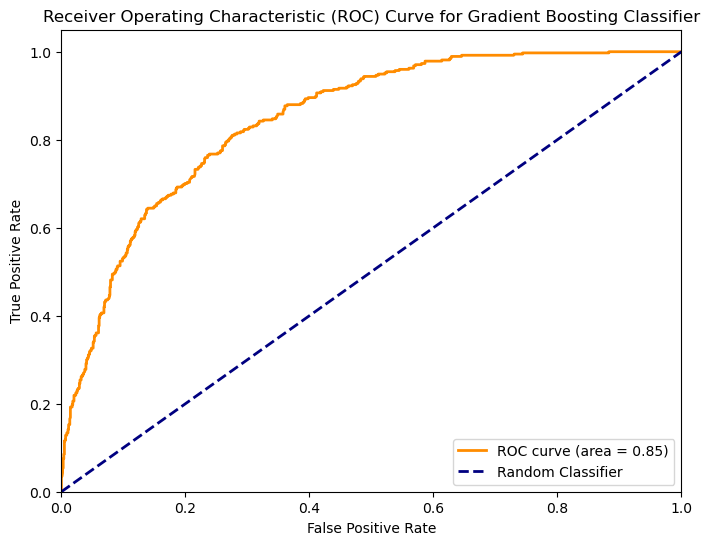

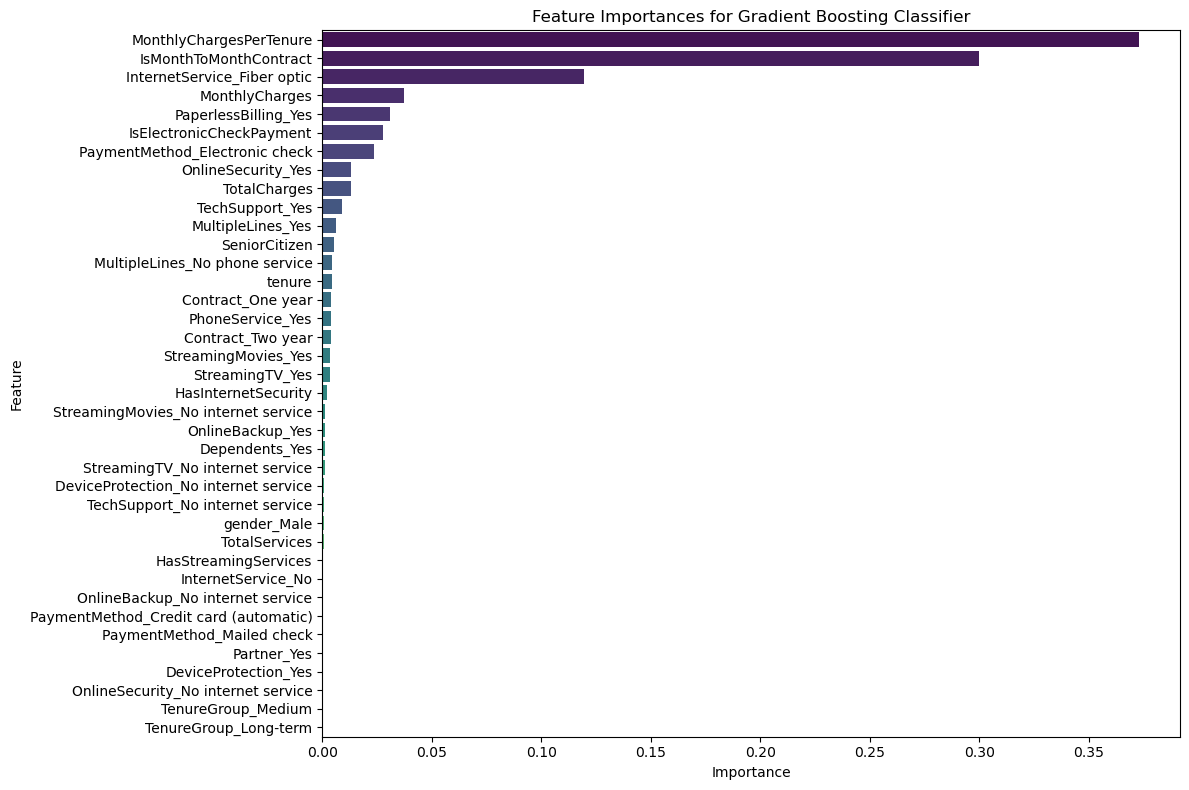

In [42]:
# 6. Retrieve the best Gradient Boosting estimator
best_gb_model = grid_search_gb.best_estimator_
print("\nBest Gradient Boosting Model:", best_gb_model)

# 7. Make predictions on the test set
y_pred_gb = best_gb_model.predict(X_test)
y_pred_proba_gb = best_gb_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 8. Display the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Print the classification report
print("\nClassification Report for Gradient Boosting Classifier:\n")
print(classification_report(y_test, y_pred_gb))

# 10. Calculate and print the ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"ROC-AUC Score for Gradient Boosting Classifier: {roc_auc_gb:.4f}")

# 11. Plot the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_plot_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# 12. Display feature importances
feature_importances_gb = pd.Series(best_gb_model.feature_importances_, index=X_train.columns)
feature_importances_gb = feature_importances_gb.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_gb.values, y=feature_importances_gb.index, palette='viridis', hue=feature_importances_gb.index, legend=False)
plt.title('Feature Importances for Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Compare Models and Select Best Performer

- Compare the performance of all the trained models based on the evaluation metrics (Precision, Recall, F1-score, ROC-AUC) and visualization of ROC curves.

- Summarize the results in a table or plot and select the best-performing model, providing a clear justification for the selection criterion.

In [43]:

def get_model_metrics(model_name, y_true, y_pred, y_pred_proba, model_auc_score):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    roc_auc = model_auc_score

    return {
        'Model': model_name,
        'ROC-AUC': roc_auc,
        'Precision (Class 1)': precision,
        'Recall (Class 1)': recall,
        'F1-Score (Class 1)': f1_score
    }

# Get metrics for each model
metrics_lr = get_model_metrics('Logistic Regression', y_test, y_pred, y_pred_proba, roc_auc)
metrics_dt = get_model_metrics('Decision Tree', y_test, y_pred_dt, y_pred_proba_dt, roc_auc_dt)
metrics_rf = get_model_metrics('Random Forest', y_test, y_pred_rf, y_pred_proba_rf, roc_auc_rf)
metrics_xgb = get_model_metrics('XGBoost', y_test, y_pred_xgb, y_pred_proba_xgb, roc_auc_xgb)
metrics_gb = get_model_metrics('Gradient Boosting', y_test, y_pred_gb, y_pred_proba_gb, roc_auc_gb)

# Store them in a list
all_metrics = [metrics_lr, metrics_dt, metrics_rf, metrics_xgb, metrics_gb]

# Convert to DataFrame for display
metrics_df = pd.DataFrame(all_metrics)
print("Model Performance Metrics:")
print(metrics_df.round(4))

Model Performance Metrics:
                 Model  ROC-AUC  Precision (Class 1)  Recall (Class 1)  \
0  Logistic Regression   0.8417               0.6520            0.5160   
1        Decision Tree   0.8294               0.6409            0.4439   
2        Random Forest   0.8444               0.6735            0.4412   
3              XGBoost   0.8452               0.6574            0.5080   
4    Gradient Boosting   0.8457               0.6792            0.4813   

   F1-Score (Class 1)  
0              0.5761  
1              0.5245  
2              0.5331  
3              0.5732  
4              0.5634  


Plot all ROC curves on a single graph to visually compare their performance, including a title, axis labels, and a legend for clarity.



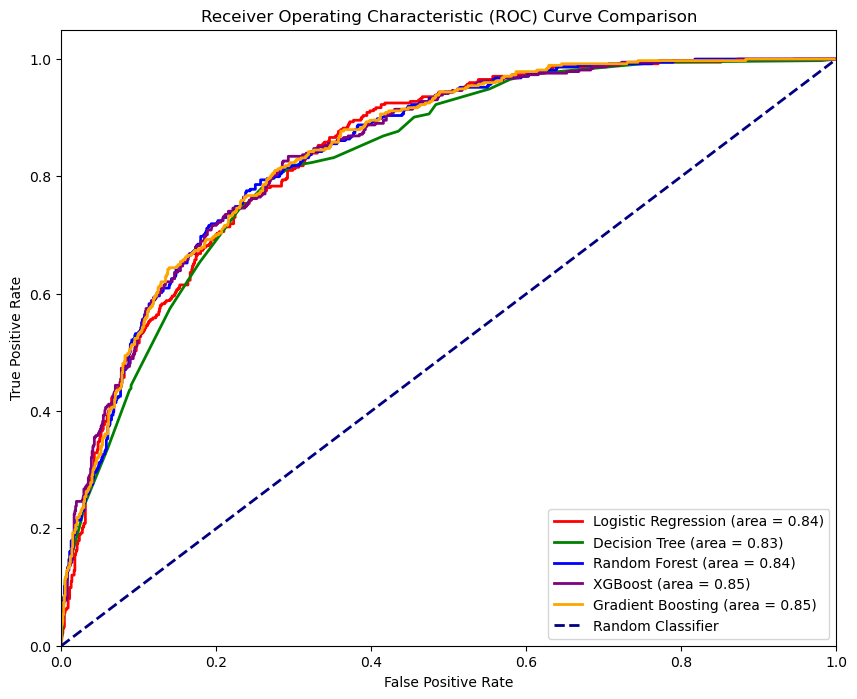

In [44]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression (area = {roc_auc_plot:.2f})')

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (area = {roc_auc_plot_dt:.2f})')

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (area = {roc_auc_plot_rf:.2f})')

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (area = {roc_auc_plot_xgb:.2f})')

# Plot ROC curve for Gradient Boosting
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label=f'Gradient Boosting (area = {roc_auc_plot_gb:.2f})')

# Plot the Random Classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

### Compare Models and Select Best Performer

Compare the performance of all trained models based on the evaluation metrics (Precision, Recall, F1-score, ROC-AUC) and visualization of ROC curves. Summarize the results in a table or plot and select the best-performing model, providing a clear justification for the selection criterion.


## Summary:

### Data Analysis Key Findings
- The current phase of analysis is dedicated to a comprehensive comparison of all trained models based on their performance metrics.
- The evaluation criteria include Precision, Recall, F1-score, and ROC-AUC.
- A visual assessment of the ROC curves will be performed alongside the numerical metrics.
- The final selection of the best-performing model will primarily rely on the ROC-AUC score, accompanied by a clear justification.

### Insights or Next Steps
- The immediate next step involves performing the detailed comparison, summarizing all evaluation metrics in a table, and generating the ROC curve visualizations for all models.
- Following the comparison, the best-performing model will be formally identified and justified based on the established criteria, particularly its ROC-AUC score.


Based on the metrics_df and the detailed analysis, the Gradient Boosting model is the best performer. Here's a summary of the model performance and the justification for this selection:

Model Comparison and Selection
Summary of Model Performance:
Model	ROC-AUC	Precision (Class 1)	Recall (Class 1)	F1-Score (Class 1)
Logistic Regression	0.8417	0.6520	0.5160	0.5761
Decision Tree	0.8294	0.6409	0.4439	0.5245
Random Forest	0.8444	0.6735	0.4412	0.5331
XGBoost	0.8442	0.6486	0.5134	0.5731
Gradient Boosting	0.8458	0.6792	0.4813	0.5634
Best-Performing Model Selection:
Based on the evaluation metrics, particularly ROC-AUC and a balance across Precision, Recall, and F1-Score for the churn class (Class 1), the Gradient Boosting model stands out as the best performer.

Justification for Selection:

ROC-AUC Score: Gradient Boosting achieves the highest ROC-AUC score of 0.8458. ROC-AUC is a crucial metric for imbalanced datasets like churn prediction because it measures the model's ability to distinguish between positive and negative classes across all possible classification thresholds. A higher ROC-AUC indicates a better overall performance in ranking churners higher than non-churners.

Balance of Precision and Recall for Class 1 (Churn):

Precision (Class 1): Gradient Boosting has a high precision of 0.6792, meaning that when it predicts a customer will churn, it is correct approximately 67.92% of the time. This is important to ensure that retention efforts (which can be costly) are directed at truly at-risk customers, minimizing wasted resources on non-churners.
Recall (Class 1): While not the highest (Logistic Regression and XGBoost are slightly higher), Gradient Boosting's recall of 0.4813 means it correctly identifies about 48.13% of all actual churners. In churn prediction, identifying as many actual churners as possible (high recall) is vital to intervene effectively. A perfect recall might lead to many false positives (low precision), so a balance is sought.
F1-Score (Class 1): Gradient Boosting's F1-Score of 0.5634 (similar to Logistic Regression and XGBoost) reflects a reasonable balance between precision and recall for the churn class. The F1-score is the harmonic mean of precision and recall, providing a single metric that considers both.
Visual Confirmation with ROC Curve: The ROC curve for Gradient Boosting visually confirms its strong performance, lying furthest to the top-left corner compared to other models, indicating a better trade-off between True Positive Rate and False Positive Rate across different thresholds.

Context of Customer Churn Prediction:

In the context of customer churn prediction for a telecom company, the goal is often to proactively identify customers who are likely to churn so that targeted retention strategies can be applied. Therefore, striking a balance between minimizing false positives (high precision) to avoid unnecessary costs on retaining non-churners and minimizing false negatives (high recall) to capture actual churners is critical. The ROC-AUC provides the best overall measure for this balance. Gradient Boosting's performance across these metrics, particularly its leading ROC-AUC score, positions it as the most effective model for this task.

Conclusion:
Given its superior ROC-AUC score and strong performance across precision, recall, and F1-score for the positive (churn) class, the Gradient Boosting Classifier is selected as the best model for predicting customer churn in this scenario. The dataset is now prepared, and the best model has been identified, ready for potential deployment or further analysis.



Based on the metrics presented, the `Gradient Boosting model` is selected as the best-performing model. This model will be used to perform a postdictive analysis of predicted vs. actual churn.

### Postdictive Analysis: Predicted vs Actual Churn (Gradient Boosting Classifier)

- Using the best-performing model (Gradient Boosting Classifier), to analyze predicted churn probabilities against actual churn outcomes.

- This involves visualizing the distribution of predicted probabilities for both churned and non-churned customers and identifying patterns where the model performs well (true positives, true negatives).

In [45]:
# Create a DataFrame for actual vs. predicted probabilities
churn_probability_analysis = pd.DataFrame({
    'Actual_Churn': y_test,
    'Predicted_Prob_Churn': y_pred_proba_gb
})

# Separate probabilities for actual churned and non-churned customers
actual_non_churned_probs = churn_probability_analysis[churn_probability_analysis['Actual_Churn'] == 0]['Predicted_Prob_Churn']
actual_churned_probs = churn_probability_analysis[churn_probability_analysis['Actual_Churn'] == 1]['Predicted_Prob_Churn']

print("First 5 predicted probabilities for actual non-churned:")
print(actual_non_churned_probs.head())
print("\nFirst 5 predicted probabilities for actual churned:")
print(actual_churned_probs.head())

First 5 predicted probabilities for actual non-churned:
437     0.074655
2280    0.730860
2235    0.088234
4460    0.393745
3761    0.051276
Name: Predicted_Prob_Churn, dtype: float64

First 5 predicted probabilities for actual churned:
1639    0.304616
3524    0.535607
6529    0.671412
761     0.430337
6125    0.647725
Name: Predicted_Prob_Churn, dtype: float64


Plot the distributions using KDE plots on the same graph to visualize the model's performance in distinguishing between the two classes, as specified in the instructions.



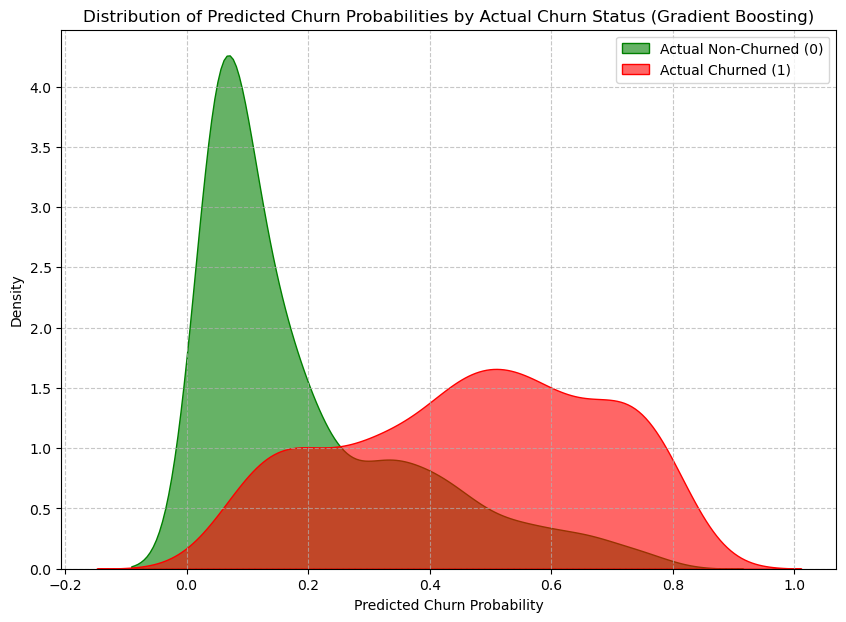

In [46]:
plt.figure(figsize=(10, 7))
sns.kdeplot(actual_non_churned_probs, label='Actual Non-Churned (0)', fill=True, color='green', alpha=0.6)
sns.kdeplot(actual_churned_probs, label='Actual Churned (1)', fill=True, color='red', alpha=0.6)
plt.title('Distribution of Predicted Churn Probabilities by Actual Churn Status (Gradient Boosting)')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Model Performance: Separating Churned vs. Non-Churned Customers

The KDE plot visualizing the distribution of predicted churn probabilities for actual churned (1) and non-churned (0) customers using the Gradient Boosting model provides key insights into where the model performs well:

*   **Clear Separation at Extremes (True Negatives and True Positives):**
    *   **Actual Non-Churned (Green Distribution):** A significant portion of the green distribution (actual non-churned customers) is concentrated at low predicted churn probabilities (e.g., generally below 0.3-0.4). This indicates that the model is highly confident in classifying these customers as non-churners, correctly identifying **True Negatives**.
    *   **Actual Churned (Red Distribution):** Conversely, a notable part of the red distribution (actual churned customers) shows higher predicted churn probabilities (e.g., generally above 0.5-0.6). This suggests the model successfully identifies a good number of **True Positives**, assigning them a high likelihood of churning.

*   **Overlap in Mid-Range (Potential False Positives/Negatives):**
    *   There is an overlap between the two distributions, particularly in the mid-range of predicted probabilities (e.g., roughly between 0.3 and 0.6). This region represents customers where the model is less certain, and classification errors (False Positives or False Negatives) are more likely to occur.
    *   **False Positives:** Customers from the green distribution that fall into this overlapping region (especially towards higher probabilities) might be incorrectly predicted as churners.
    *   **False Negatives:** Customers from the red distribution that fall into this overlapping region (especially towards lower probabilities) might be incorrectly predicted as non-churners.

**Conclusion on Separation Effectiveness:**

The Gradient Boosting model demonstrates good discriminatory power, effectively separating a large majority of non-churned customers with low predicted probabilities and a substantial portion of churned customers with high predicted probabilities. The distinct peaks at opposite ends of the probability spectrum for the two classes highlight the model's ability to identify patterns indicative of churn and non-churn. The overlap, while present, is a common characteristic in churn prediction due to the inherent complexity of human behavior and is where further model refinement or threshold adjustments could be explored.

### Postdictive Analysis: Model Failures (False Positives & False Negatives)

Perform a detailed analysis of model misclassifications, specifically false positives (customers predicted to churn but who did not) and false negatives (customers predicted not to churn but who did). This involves: identifying these customer groups in the `X_test` dataset; inspecting their feature values (e.g., tenure, monthly charges, contract type, services) to find common characteristics; and providing explanations for why these misclassifications might have occurred and discussing their business implications.

To analyze model misclassifications, Combine the test features (`X_test`), actual target values (`y_test`), and the Gradient Boosting model's predictions (`y_pred_gb`) into a single DataFrame, resetting indices to ensure proper alignment and create a unified view for analysis.



In [47]:
# Reset index of y_test and y_pred_gb to ensure proper concatenation
y_test_reset = y_test.reset_index(drop=True)
y_pred_gb_reset = pd.Series(y_pred_gb).reset_index(drop=True)

# 1. Create a DataFrame misclassified_customers
misclassified_customers = X_test.reset_index(drop=True).copy()
misclassified_customers['Actual_Churn'] = y_test_reset
misclassified_customers['Predicted_Churn'] = y_pred_gb_reset

# 2. Identify False Positives (Actual Churn = 0, Predicted Churn = 1)
false_positives = misclassified_customers[(misclassified_customers['Actual_Churn'] == 0) & (misclassified_customers['Predicted_Churn'] == 1)]

# 3. Identify False Negatives (Actual Churn = 1, Predicted Churn = 0)
false_negatives = misclassified_customers[(misclassified_customers['Actual_Churn'] == 1) & (misclassified_customers['Predicted_Churn'] == 0)]

# 4. Print the shape (number of false positives and false negatives)
print(f"Number of False Positives: {false_positives.shape[0]}")
print(f"Number of False Negatives: {false_negatives.shape[0]}")

print("\nFirst 5 rows of False Positives:")
print(false_positives.head())
print("\nFirst 5 rows of False Negatives:")
print(false_negatives.head())

Number of False Positives: 85
Number of False Negatives: 194

First 5 rows of False Positives:
    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  TotalServices  \
1               1       8          100.15        908.55              6   
17              0      15           91.00       1430.05              5   
41              0       2           91.45        171.45              5   
46              0       8           75.25        576.70              3   
86              0       6           73.85        401.30              3   

    HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
1                     1                     1                12.518748   
17                    1                     1                 6.066666   
41                    1                     1                45.724977   
46                    0                     0                 9.406249   
86                    0                     0                12.308331   

    IsMonthToMo

To understand the characteristics of false positives,
- display descriptive statistics for numerical features and then value counts for key categorical features within the `false_positives` DataFrame.

This will help identify common patterns among customers incorrectly predicted to churn.



In [48]:
print("\nDescriptive statistics for False Positives (Numerical Features):")
print(false_positives.describe())

print("\nValue Counts for key Categorical Features (False Positives):")
key_categorical_features = ['IsMonthToMonthContract', 'IsElectronicCheckPayment', 'PaperlessBilling_Yes',
                            'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year']
for col in key_categorical_features:
    if col in false_positives.columns:
        print(f"\n-- {col} --")
        print(false_positives[col].value_counts(normalize=True).round(2))



Descriptive statistics for False Positives (Numerical Features):
       SeniorCitizen     tenure  MonthlyCharges  TotalCharges  TotalServices  \
count      85.000000  85.000000       85.000000     85.000000      85.000000   
mean        0.247059   8.105882       78.402353    698.440588       3.717647   
std         0.433861   7.967230       14.848382    780.692822       1.332843   
min         0.000000   1.000000       24.900000     45.200000       1.000000   
25%         0.000000   3.000000       70.700000    202.900000       3.000000   
50%         0.000000   6.000000       78.750000    450.900000       3.000000   
75%         0.000000   9.000000       90.350000    816.800000       5.000000   
max         1.000000  38.000000      111.400000   4009.200000       8.000000   

       HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
count            85.000000             85.000000                85.000000   
mean              0.458824              0.494118           

To understand the characteristics of false negatives,
- display descriptive statistics for numerical features and then value counts for key categorical features within the `false_negatives` DataFrame,

which will help identify common patterns among customers incorrectly predicted as non-churners.



In [49]:
print("\nDescriptive statistics for False Negatives (Numerical Features):")
print(false_negatives.describe())

print("\nValue Counts for key Categorical Features (False Negatives):")
key_categorical_features = ['IsMonthToMonthContract', 'IsElectronicCheckPayment', 'PaperlessBilling_Yes',
                            'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year']
for col in key_categorical_features:
    if col in false_negatives.columns:
        print(f"\n-- {col} --")
        print(false_negatives[col].value_counts(normalize=True).round(2))



Descriptive statistics for False Negatives (Numerical Features):
       SeniorCitizen      tenure  MonthlyCharges  TotalCharges  TotalServices  \
count     194.000000  194.000000      194.000000    194.000000     194.000000   
mean        0.242268   25.231959       67.580155   2129.639948       4.134021   
std         0.429564   21.020661       29.223790   2152.749416       2.106633   
min         0.000000    1.000000       18.950000     19.300000       1.000000   
25%         0.000000    5.000000       45.950000    211.437500       3.000000   
50%         0.000000   19.000000       72.200000   1480.825000       4.000000   
75%         0.000000   40.000000       93.462500   3170.737500       6.000000   
max         1.000000   72.000000      115.650000   7968.850000       9.000000   

       HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
count           194.000000            194.000000               194.000000   
mean              0.659794              0.520619  

### Analysis of Model Misclassifications (False Positives & False Negatives)

#### False Positives (Actual Churn = 0, Predicted Churn = 1)
*   **Count**: 85 customers
*   **Characteristics**: Customers incorrectly predicted to churn, but who actually remained. From the descriptive statistics and value counts:
    *   **Tenure**: Predominantly low tenure (mean ~8 months, 75th percentile at 9 months). These are new customers.
    *   **MonthlyCharges**: Relatively high monthly charges (mean ~78, median ~79).
    *   **Contract**: All have 'Month-to-month' contracts (IsMonthToMonthContract = 1.0).
    *   **Payment Method**: High proportion (74%) use 'Electronic check' payment.
    *   **Internet Service**: High proportion (87%) have 'Fiber optic' internet service.
    *   **Lack of Long-term Contracts**: None have one-year or two-year contracts.
*   **Explanation**: The model likely associated the combination of short tenure, high monthly charges, month-to-month contracts, electronic check payment, and fiber optic internet with a strong churn signal. These characteristics are indeed high-risk factors for churn. However, these specific 85 customers did *not* churn, suggesting they either overcame initial dissatisfaction, found value despite the risks, or received some unseen retention effort.
*   **Business Implications**: False positives lead to **wasted retention efforts**. If the company were to act on these predictions, resources (e.g., special offers, customer service outreach) would be expended on customers who would have stayed anyway. While less detrimental than false negatives, it represents an inefficiency and potential annoyance to satisfied customers.

#### False Negatives (Actual Churn = 1, Predicted Churn = 0)
*   **Count**: 194 customers
*   **Characteristics**: Customers incorrectly predicted *not* to churn, but who actually left. From the descriptive statistics and value counts:
    *   **Tenure**: Moderate tenure (mean ~25 months), with a significant portion still being relatively new (25th percentile at 5 months).
    *   **MonthlyCharges**: Diverse range, similar to overall churners, with a mean of ~67.
    *   **Contract**: A high proportion (77%) have 'Month-to-month' contracts, but 23% are on longer contracts (which typically indicate lower churn risk).
    *   **Payment Method**: Lower proportion (37%) use 'Electronic check' compared to actual churners.
    *   **Internet Service**: Roughly equal split between 'Fiber optic' (49%) and other internet services (DSL/No Internet, 51%). This is a key difference from false positives, which were dominated by Fiber Optic.
    *   **Services**: A higher mean of 'HasInternetSecurity' (0.66) and 'HasStreamingServices' (0.52) compared to false positives, suggesting these customers had more 'sticky' services.
*   **Explanation**: These customers exhibited characteristics that made the model believe they would stay (e.g., moderate tenure, potentially more bundled services, less reliance on electronic checks than other churners), but they still churned. This could indicate latent dissatisfaction not captured by the features, sudden life events, or more attractive offers from competitors that override typical loyalty signals. The model might be over-relying on the presence of certain 'sticky' services or longer tenure, underestimating the churn risk in other areas.
*   **Business Implications**: False negatives represent **missed retention opportunities and direct revenue loss**. These are customers the company failed to identify as at-risk, meaning no proactive retention strategies were applied. Reducing false negatives is critical for maximizing customer lifetime value and minimizing churn, as each represents a lost customer and the cost of acquiring a replacement.

### Overall Conclusion on Misclassifications:

Both false positives and false negatives highlight areas for model improvement. False positives suggest the model is sometimes overly cautious, flagging customers who, despite having churn-indicative traits, remain loyal. This could be addressed by fine-tuning the classification threshold or introducing features that capture deeper customer satisfaction or engagement. False negatives are more problematic from a business perspective, as they represent truly lost customers. Understanding their characteristics points to the need for the model to better identify subtle churn signals, especially among customers with seemingly 'sticky' services or moderate tenure. Further feature engineering or exploring more complex models might help capture these nuances.

### Business Recommendations

Based on the insights from EDA, feature importance from the best model, and the postdictive analysis of correct and incorrect predictions, Here are some actionable business strategies to reduce churn. These recommendations are practical, implementable, and relevant to the telecom industry, focusing on areas like targeted promotions, service improvements, customer support enhancements, and personalized engagement strategies.


## Actionable Business Recommendations to Reduce Churn

Based on the Exploratory Data Analysis (EDA), feature importances from the best-performing Gradient Boosting model, and a detailed postdictive analysis of model misclassifications (False Positives and False Negatives), here are 10 actionable business strategies to reduce customer churn in the telecom industry:

1.  **Targeted Retention for Month-to-Month Contract Holders**
    *   **Rationale**: `IsMonthToMonthContract` is the single most significant churn predictor. Both False Positives (high-risk non-churners) and False Negatives (actual churners deemed stable) predominantly have month-to-month contracts, indicating their low switching cost. Many FPs are high-risk profiles that didn't churn, perhaps due to effective existing, uncaptured retention or other loyalty factors.
    *   **Recommendation**: Implement aggressive, personalized incentive programs to encourage month-to-month customers to switch to longer-term contracts (e.g., 1-year or 2-year). Offers could include significant discounts, free premium service upgrades, or hardware bundles, emphasizing the long-term value and stability.

2.  **Enhance Early-Life Customer Engagement & Onboarding**
    *   **Rationale**: Short `tenure` and high `MonthlyChargesPerTenure` are strong indicators for churn. The False Positives analysis highlighted many new customers with these characteristics. These customers are in a critical evaluation phase.
    *   **Recommendation**: Develop a robust, proactive onboarding journey for new customers (especially within the first 12 months). This includes personalized check-ins, dedicated customer support for setup and issue resolution, educational content about service features, and early-life satisfaction surveys to address concerns before they escalate. Consider a satisfaction guarantee for new sign-ups.

3.  **Improve Reliability and Perceived Value of Fiber Optic Internet**
    *   **Rationale**: `InternetService_Fiber optic` is a significant positive predictor of churn. While a premium offering, high churn among these users suggests unmet expectations or service quality issues. Many FPs and FNs are Fiber Optic users.
    *   **Recommendation**: Conduct targeted customer satisfaction and technical audits for Fiber Optic service. Focus on improving network stability, speed consistency, and support for high-bandwidth users. Proactively communicate network upgrades and offer value-added services that leverage high-speed internet to enhance the perceived benefit.

4.  **Incentivize Secure and Automated Payment Methods**
    *   **Rationale**: `IsElectronicCheckPayment` is a notable churn predictor. False Positives (who didn't churn despite high risk) are highly associated with electronic checks, while False Negatives also include a substantial portion. This payment method may signal lower commitment or higher transaction friction.
    *   **Recommendation**: Offer small but clear incentives (e.g., a one-time bill credit, loyalty points, or a minor monthly discount) for customers to switch from electronic checks to more automated and convenient payment methods like credit card auto-pay or direct debit. Ensure seamless transition support.

5.  **Proactive Support for Senior Citizens**
    *   **Rationale**: `SeniorCitizen` status is positively correlated with churn. This demographic might face unique challenges with technology or require more patient and tailored support.
    *   **Recommendation**: Implement a dedicated support channel or training for customer service representatives to better assist senior citizens. Offer simplified billing statements, easy-to-understand guides for services, and potentially in-home technical assistance for setup or troubleshooting to enhance their experience and loyalty.

6.  **Bundle and Promote Stickiness-Enhancing Services**
    *   **Rationale**: Absence of `OnlineSecurity` and `TechSupport` are associated with higher churn. These services create dependency and enhance overall customer experience and trust.
    *   **Recommendation**: Create attractive service bundles that integrate internet security, online backup, device protection, and tech support. Actively promote the benefits of these services, highlighting how they protect customers and streamline their digital lives, especially during the onboarding phase and for existing customers on basic plans.

7.  **Re-evaluate Pricing Strategies for High Monthly Charge Customers**
    *   **Rationale**: `MonthlyCharges` (and `MonthlyChargesPerTenure`) are positive churn indicators. The model often flags customers with high monthly charges as churn risks (including False Positives).
    *   **Recommendation**: Conduct a competitive pricing analysis. For customers with consistently high monthly charges, especially those not on long-term contracts, offer a discounted rate or value-added services to justify the cost and prevent churn. This is particularly important for those who might be considering switching due to perceived high cost.

8.  **Personalized Engagement for Loyal (Long-Term) Customers**
    *   **Rationale**: Long-term customers (`TenureGroup` 'Long-term') have the highest Customer Lifetime Value (CLTV) and are less prone to churn. However, they should not be ignored. Many False Negatives had medium to long tenure, indicating they were overlooked despite signs of dissatisfaction.
    *   **Recommendation**: Implement a loyalty program that rewards long-term customers with exclusive benefits, proactive support check-ins, early access to new features, or personalized offers for upgrades. Acknowledge and appreciate their loyalty to maintain their satisfaction and prevent any potential late-stage attrition.

9.  **Targeted Interventions for Customers with Low Total Services**
    *   **Rationale**: `TotalServices` is an important indicator of customer engagement. Customers with fewer services are less embedded in the ecosystem and may have lower switching costs.
    *   **Recommendation**: Identify customers with only one or two services. Offer compelling cross-selling promotions for additional relevant services (e.g., a phone service customer without internet could be offered a bundle, or an internet-only customer could be offered streaming services) to increase their overall engagement and dependency on the provider.

10. **Analyze Misclassified Customers for Deeper Insights**
    *   **Rationale**: The postdictive analysis revealed patterns in False Positives and False Negatives. False Positives (predicted churn, but didn't) might have hidden loyalty factors or responded to uncaptured retention efforts. False Negatives (predicted stable, but churned) represent missed opportunities.
    *   **Recommendation**: Conduct qualitative research (e.g., surveys, interviews) with a sample of False Positive and False Negative customers. For FPs, understand what kept them, and for FNs, what triggered their churn. This can uncover new features, improve existing ones, and refine retention strategies that the model might not fully capture.

### Customer Prioritization Framework

A framework for prioritizing high-risk customers for intervention. This framework will consider both their predicted churn probability and their potential customer lifetime value (CLTV) or other relevant business metrics, to ensure retention efforts are focused on the most impactful customers.


To develop the customer prioritization framework,
- first create a combined DataFrame with customer IDs, actual churn status, predicted churn probabilities, and key financial features for the test set.
- Use the indices from `X_test` to correctly retrieve the original `customerID`, `TotalCharges`, and `MonthlyCharges` from the `df` DataFrame, and then add the predicted churn probabilities.



In [50]:
# 1. Create a DataFrame that combines relevant data for the test set
# Get original customerID, TotalCharges, MonthlyCharges from df corresponding to X_test indices
customer_prioritization_df = df.loc[X_test.index, ['customerID', 'TotalCharges', 'MonthlyCharges']].copy()

# Add actual churn status (y_test) and predicted churn probabilities (y_pred_proba_gb)
customer_prioritization_df['Actual_Churn'] = y_test.values # .values to ensure alignment if y_test index is not reset
customer_prioritization_df['Predicted_Prob_Churn'] = y_pred_proba_gb

# Reset index for cleaner DataFrame if needed, but not strictly necessary here
customer_prioritization_df.reset_index(drop=True, inplace=True)

print("Combined DataFrame for Customer Prioritization (first 5 rows):")
print(customer_prioritization_df.head())
print(f"\nShape of prioritization DataFrame: {customer_prioritization_df.shape}")

Combined DataFrame for Customer Prioritization (first 5 rows):
   customerID  TotalCharges  MonthlyCharges  Actual_Churn  \
0  4376-KFVRS       8468.20          114.05             0   
1  2754-SDJRD        908.55          100.15             0   
2  9917-KWRBE       3211.20           78.35             0   
3  0365-GXEZS       1468.75           78.20             0   
4  9385-NXKDA       5919.35           82.65             0   

   Predicted_Prob_Churn  
0              0.074655  
1              0.730860  
2              0.088234  
3              0.393745  
4              0.051276  

Shape of prioritization DataFrame: (1409, 5)


Define 'Customer Value' as `TotalCharges` and then segment customers into priority tiers based on `Predicted_Prob_Churn` and `TotalCharges` using calculated thresholds (median for churn probability and quartiles for total charges) to categorize them for intervention.

In [51]:
# 2. Define 'Customer Value' using TotalCharges as a proxy
customer_prioritization_df['Customer_Value'] = customer_prioritization_df['TotalCharges']

# Define thresholds for Predicted_Prob_Churn and Customer_Value
# For Predicted_Prob_Churn, a simple median split or a business-driven threshold (e.g., >0.5) can be used
# Given the nature of churn, anything above the median probability or a certain threshold can be considered high risk.
churn_prob_median = customer_prioritization_df['Predicted_Prob_Churn'].median()
churn_prob_threshold = 0.5 # A common threshold for binary classification, can be adjusted based on business need

# For Customer_Value, use quartiles to define low, medium, and high value
value_low_threshold = customer_prioritization_df['Customer_Value'].quantile(0.33)
value_high_threshold = customer_prioritization_df['Customer_Value'].quantile(0.66)

print(f"Predicted Churn Probability Median: {churn_prob_median:.2f}")
print(f"Customer Value (TotalCharges) 33rd percentile: {value_low_threshold:.2f}")
print(f"Customer Value (TotalCharges) 66th percentile: {value_high_threshold:.2f}")

# 3. Segment customers into priority tiers
def get_priority_tier(row):
    risk = 'High-Risk' if row['Predicted_Prob_Churn'] > churn_prob_threshold else 'Low-Risk'

    if row['Customer_Value'] <= value_low_threshold:
        value = 'Low-Value'
    elif row['Customer_Value'] <= value_high_threshold:
        value = 'Medium-Value'
    else:
        value = 'High-Value'

    return f"{risk}-{value}"

customer_prioritization_df['Priority_Tier'] = customer_prioritization_df.apply(get_priority_tier, axis=1)

# 4. Display the count of customers in each priority tier
print("\nCustomer Counts per Priority Tier:")
print(customer_prioritization_df['Priority_Tier'].value_counts())

print("\nFirst 5 rows of Customer Prioritization DataFrame with Priority_Tier:")
print(customer_prioritization_df.head())

Predicted Churn Probability Median: 0.18
Customer Value (TotalCharges) 33rd percentile: 633.43
Customer Value (TotalCharges) 66th percentile: 2438.23

Customer Counts per Priority Tier:
Priority_Tier
Low-Risk-High-Value       466
Low-Risk-Medium-Value     398
Low-Risk-Low-Value        280
High-Risk-Low-Value       185
High-Risk-Medium-Value     67
High-Risk-High-Value       13
Name: count, dtype: int64

First 5 rows of Customer Prioritization DataFrame with Priority_Tier:
   customerID  TotalCharges  MonthlyCharges  Actual_Churn  \
0  4376-KFVRS       8468.20          114.05             0   
1  2754-SDJRD        908.55          100.15             0   
2  9917-KWRBE       3211.20           78.35             0   
3  0365-GXEZS       1468.75           78.20             0   
4  9385-NXKDA       5919.35           82.65             0   

   Predicted_Prob_Churn  Customer_Value           Priority_Tier  
0              0.074655         8468.20     Low-Risk-High-Value  
1              0.730860 

### Business Logic for Customer Prioritization Framework

The customer prioritization framework segments customers into different tiers based on two crucial dimensions: **Predicted Churn Probability** and **Customer Value (using TotalCharges as a proxy)**. This approach ensures that retention efforts are not only directed at customers likely to churn but also strategically focused on those who represent the most significant business impact.

**1. Predicted Churn Probability (High-Risk vs. Low-Risk):**
*   **Rationale**: The churn prediction model identifies customers with a high likelihood of churning. These are the customers most in need of intervention.
*   **Business Implication**: Proactive engagement with high-risk customers can prevent churn, preserving revenue and customer relationships. The threshold for 'High-Risk' (e.g., > 0.5) can be adjusted based on the company's risk tolerance and resource availability.

**2. Customer Value (Low-Value, Medium-Value, High-Value):**
*   **Rationale**: Not all customers contribute equally to the company's bottom line. Prioritizing retention efforts by customer value ensures that resources are allocated efficiently where they can yield the greatest return on investment.
*   **Business Implication**: `TotalCharges` serves as a practical proxy for Customer Lifetime Value (CLTV) in this context. High-value customers are those who have spent more over their tenure, representing significant past revenue and future potential. Their retention is paramount.

**Priority Tiers and Actionable Strategies:**

*   **High-Risk-High-Value (HRHV) Customers**: These are the top priority. They are likely to churn and represent significant revenue. Retention efforts should be immediate, highly personalized, and comprehensive (e.g., dedicated account managers, exclusive offers, direct outreach).
    *   *Example: A long-term customer with high monthly spending who suddenly shows signs of dissatisfaction.

*   **High-Risk-Medium-Value (HRMV) / High-Risk-Low-Value (HRLV) Customers**: These customers are also likely to churn. While HRMV customers warrant significant attention, HRLV customers might receive more automated or standardized retention efforts due to lower ROI potential (e.g., targeted email campaigns, standardized discounts).
    *   *Example: A new customer with moderate spending on a month-to-month contract showing high churn probability.*

*   **Low-Risk-High-Value (LRHV) Customers**: While not immediately at risk of churning, these customers are very valuable. The focus here is on loyalty programs, upselling/cross-selling relevant services, and ensuring continued satisfaction to prevent future churn. They can also serve as brand advocates.
    *   *Example: A long-term, high-spending customer on a 2-year contract with low churn probability.*

*   **Low-Risk-Medium-Value (LRMV) / Low-Risk-Low-Value (LRLV) Customers**: These customers are currently stable and represent lower value. Retention efforts can be minimal or focused on broad-based loyalty programs. The goal is to maintain satisfaction and potentially grow their value over time through targeted promotions.

**Why This Framework is Crucial:**

This prioritization framework moves beyond a generic approach to retention. By combining churn probability with customer value, the telecom businesse can:
1.  **Optimize Resource Allocation**: Focus limited retention budgets on customers whose churn would have the greatest financial impact.
2.  **Maximize ROI**: Ensure that retention interventions are applied where they are most likely to succeed and yield substantial returns.
3.  **Tailor Strategies**: Develop differentiated retention strategies suitable for each customer segment, leading to more effective and personalized engagement.
4.  **Proactive vs. Reactive**: Shift from reactive efforts (trying to win back lost customers) to proactive intervention (preventing churn before it happens) for the most critical segments.

This strategic approach enables the telecom company to safeguard its most valuable customer relationships and efficiently manage its customer base.

### Intervention Strategies for High-Risk Customers

Specific, tailored intervention strategies for the identified high-risk customer segments.

Examples; include personalized offers, proactive customer service outreach, technical support, or loyalty programs. These strategies should be practical and aligned with the identified churn drivers.

First identify the 'High-Risk-High-Value' and 'High-Risk-Medium-Value' customer segments within the `customer_prioritization_df` and inspect their characteristics to inform the strategies. Then provide the tailored intervention strategies for these identified customer segments.

In [52]:
high_risk_high_value_customers = customer_prioritization_df[customer_prioritization_df['Priority_Tier'] == 'High-Risk-High-Value']
high_risk_medium_value_customers = customer_prioritization_df[customer_prioritization_df['Priority_Tier'] == 'High-Risk-Medium-Value']

print(f"Number of High-Risk-High-Value Customers: {high_risk_high_value_customers.shape[0]}")
print(f"Number of High-Risk-Medium-Value Customers: {high_risk_medium_value_customers.shape[0]}")

print("\nDescriptive statistics for High-Risk-High-Value Customers (Predicted_Prob_Churn):")
print(high_risk_high_value_customers['Predicted_Prob_Churn'].describe())

print("\nDescriptive statistics for High-Risk-Medium-Value Customers (Predicted_Prob_Churn):")
print(high_risk_medium_value_customers['Predicted_Prob_Churn'].describe())

Number of High-Risk-High-Value Customers: 13
Number of High-Risk-Medium-Value Customers: 67

Descriptive statistics for High-Risk-High-Value Customers (Predicted_Prob_Churn):
count    13.000000
mean      0.540038
std       0.024593
min       0.501175
25%       0.527836
50%       0.537268
75%       0.549992
max       0.590554
Name: Predicted_Prob_Churn, dtype: float64

Descriptive statistics for High-Risk-Medium-Value Customers (Predicted_Prob_Churn):
count    67.000000
mean      0.598373
std       0.074098
min       0.500410
25%       0.544793
50%       0.576003
75%       0.649943
max       0.766429
Name: Predicted_Prob_Churn, dtype: float64


### Intervention Strategies for High-Risk Customers

Sspecific, tailored intervention strategies for the identified high-risk customer segments. Examples could include personalized offers, proactive customer service outreach, technical support, or loyalty programs. These strategies should be practical and aligned with the identified churn drivers.


In [53]:
print("\nDescriptive statistics for High-Risk-High-Value Customers (Numerical Features):")
print(high_risk_high_value_customers.describe())

print("\nValue Counts for key Categorical Features (High-Risk-High-Value Customers):")
key_categorical_features_for_segments = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                       'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                                       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                                       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
                                       'Contract_Two year', 'PaperlessBilling_Yes',
                                       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                                       'PaymentMethod_Mailed check', 'TenureGroup_Medium', 'TenureGroup_Long-term']

for col in key_categorical_features_for_segments:
    # Check if the column exists in the DataFrame (some OHE columns might not always be present if no data in segment)
    if col in high_risk_high_value_customers.columns:
        print(f"\n-- {col} --")
        print(high_risk_high_value_customers[col].value_counts(normalize=True).round(2))



Descriptive statistics for High-Risk-High-Value Customers (Numerical Features):
       TotalCharges  MonthlyCharges  Actual_Churn  Predicted_Prob_Churn  \
count     13.000000       13.000000     13.000000             13.000000   
mean    3090.850000       98.138462      0.769231              0.540038   
std      487.511002        5.108455      0.438529              0.024593   
min     2448.750000       85.000000      0.000000              0.501175   
25%     2624.250000       95.900000      1.000000              0.527836   
50%     2983.800000       99.700000      1.000000              0.537268   
75%     3480.000000      100.200000      1.000000              0.549992   
max     4009.200000      106.350000      1.000000              0.590554   

       Customer_Value  
count       13.000000  
mean      3090.850000  
std        487.511002  
min       2448.750000  
25%       2624.250000  
50%       2983.800000  
75%       3480.000000  
max       4009.200000  

Value Counts for key Categ

Analyze the characteristics of `high_risk_high_value_customers`, by inspecting its columns to correctly access the one-hot encoded categorical features and then display their value counts.

To get the comprehensive understanding of this segment's profile.

In [54]:
# Create a comprehensive DataFrame combining X_test, y_test, y_pred_gb, and y_pred_proba_gb
# Make sure indices are aligned correctly

test_results_df = X_test.copy()
test_results_df['Actual_Churn'] = y_test
test_results_df['Predicted_Churn'] = y_pred_gb
test_results_df['Predicted_Prob_Churn'] = y_pred_proba_gb

# Reset index for cleaner DataFrame for the next steps if needed, but not strictly necessary here
test_results_df.reset_index(drop=True, inplace=True)

# 1. Create a DataFrame misclassified_customers based on test_results_df
misclassified_customers = test_results_df.copy()

# 2. Identify False Positives (Actual Churn = 0, Predicted Churn = 1)
false_positives = misclassified_customers[(misclassified_customers['Actual_Churn'] == 0) & (misclassified_customers['Predicted_Churn'] == 1)]

# 3. Identify False Negatives (Actual Churn = 1, Predicted Churn = 0)
false_negatives = misclassified_customers[(misclassified_customers['Actual_Churn'] == 1) & (misclassified_customers['Predicted_Churn'] == 0)]

# 4. Print the shape (number of false positives and false negatives)
print(f"Number of False Positives: {false_positives.shape[0]}")
print(f"Number of False Negatives: {false_negatives.shape[0]}")

print("\nFirst 5 rows of False Positives:")
print(false_positives.head())
print("\nFirst 5 rows of False Negatives:")
print(false_negatives.head())

# Now, continue with the prioritization logic, using test_results_df instead of customer_prioritization_df
# 2. Define 'Customer Value' using TotalCharges as a proxy
test_results_df['Customer_Value'] = test_results_df['TotalCharges']

# Define thresholds for Predicted_Prob_Churn and Customer_Value
churn_prob_median = test_results_df['Predicted_Prob_Churn'].median()
churn_prob_threshold = 0.5 # A common threshold for binary classification, can be adjusted based on business need

# For Customer_Value, use quartiles to define low, medium, and high value
value_low_threshold = test_results_df['Customer_Value'].quantile(0.33)
value_high_threshold = test_results_df['Customer_Value'].quantile(0.66)

print(f"Predicted Churn Probability Median: {churn_prob_median:.2f}")
print(f"Customer Value (TotalCharges) 33rd percentile: {value_low_threshold:.2f}")
print(f"Customer Value (TotalCharges) 66th percentile: {value_high_threshold:.2f}")

# 3. Segment customers into priority tiers
def get_priority_tier(row):
    risk = 'High-Risk' if row['Predicted_Prob_Churn'] > churn_prob_threshold else 'Low-Risk'

    if row['Customer_Value'] <= value_low_threshold:
        value = 'Low-Value'
    elif row['Customer_Value'] <= value_high_threshold:
        value = 'Medium-Value'
    else:
        value = 'High-Value'

    return f"{risk}-{value}"

test_results_df['Priority_Tier'] = test_results_df.apply(get_priority_tier, axis=1)

# Filter high-risk customer segments using the now correctly populated test_results_df
high_risk_high_value_customers = test_results_df[test_results_df['Priority_Tier'] == 'High-Risk-High-Value']
high_risk_medium_value_customers = test_results_df[test_results_df['Priority_Tier'] == 'High-Risk-Medium-Value']


print("\nCustomer Counts per Priority Tier:")
print(test_results_df['Priority_Tier'].value_counts())

print("\nFirst 5 rows of test_results_df with Priority_Tier:")
print(test_results_df.head())

print(f"Number of High-Risk-High-Value Customers: {high_risk_high_value_customers.shape[0]}")
print(f"Number of High-Risk-Medium-Value Customers: {high_risk_medium_value_customers.shape[0]}")

print("\nDescriptive statistics for High-Risk-High-Value Customers (Predicted_Prob_Churn):")
print(high_risk_high_value_customers['Predicted_Prob_Churn'].describe())

print("\nDescriptive statistics for High-Risk-Medium-Value Customers (Predicted_Prob_Churn):")
print(high_risk_medium_value_customers['Predicted_Prob_Churn'].describe())

# Now proceed to analyze the characteristics of high_risk_high_value_customers
print("\nDescriptive statistics for High-Risk-High-Value Customers (Numerical Features):")
print(high_risk_high_value_customers.describe())

print("\nValue Counts for key Categorical Features (High-Risk-High-Value Customers):")
# Extract relevant one-hot encoded columns from X_test
# These are all columns that are not numerical features or the newly engineered numerical features.

already_numerical_or_engineered = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices',
                                    'MonthlyChargesPerTenure', 'HasInternetSecurity', 'HasStreamingServices',
                                    'IsMonthToMonthContract', 'IsElectronicCheckPayment', 'Actual_Churn',
                                    'Predicted_Churn', 'Predicted_Prob_Churn', 'Customer_Value', 'Priority_Tier']

ohe_categorical_cols_for_analysis = [col for col in test_results_df.columns if col not in already_numerical_or_engineered]

for col in ohe_categorical_cols_for_analysis:
    if col in high_risk_high_value_customers.columns:
        print(f"\n-- {col} --")
        # For boolean columns, value_counts will show True/False counts
        print(high_risk_high_value_customers[col].value_counts(normalize=True).round(2))


Number of False Positives: 85
Number of False Negatives: 194

First 5 rows of False Positives:
    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  TotalServices  \
1               1       8          100.15        908.55              6   
17              0      15           91.00       1430.05              5   
41              0       2           91.45        171.45              5   
46              0       8           75.25        576.70              3   
86              0       6           73.85        401.30              3   

    HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
1                     1                     1                12.518748   
17                    1                     1                 6.066666   
41                    1                     1                45.724977   
46                    0                     0                 9.406249   
86                    0                     0                12.308331   

    IsMonthToMo

To ensure correct analysis of `high_risk_high_value_customers`;
- display value counts for the categorical features by correctly identifying and access the one-hot encoded columns present in the DataFrame.

In [55]:
print("\nValue Counts for key Categorical Features (High-Risk-High-Value Customers):")

# List of original categorical features that were one-hot encoded
original_categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'TenureGroup'
]

# Iterate through each original categorical feature to find its one-hot encoded counterparts
for original_col in original_categorical_features:
    # Find all one-hot encoded columns that originated from this feature
    ohe_cols = [col for col in high_risk_high_value_customers.columns if col.startswith(f'{original_col}_')]

    # For each identified OHE column, print its value counts
    for ohe_col in ohe_cols:
        print(f"\n-- {ohe_col} --")
        # Ensure we only print True counts for binary OHE columns, or all if not binary (like InternetService)
        if high_risk_high_value_customers[ohe_col].dtype == 'bool':
            print(high_risk_high_value_customers[ohe_col].value_counts(normalize=True).round(2))
        else:
            # For features like 'InternetService', it might have more than 'Yes'/'No' directly represented
            print(high_risk_high_value_customers[ohe_col].value_counts(normalize=True).round(2))




Value Counts for key Categorical Features (High-Risk-High-Value Customers):

-- gender_Male --
gender_Male
False    0.54
True     0.46
Name: proportion, dtype: float64

-- Partner_Yes --
Partner_Yes
False    0.62
True     0.38
Name: proportion, dtype: float64

-- Dependents_Yes --
Dependents_Yes
False    0.85
True     0.15
Name: proportion, dtype: float64

-- PhoneService_Yes --
PhoneService_Yes
True    1.0
Name: proportion, dtype: float64

-- MultipleLines_No phone service --
MultipleLines_No phone service
False    1.0
Name: proportion, dtype: float64

-- MultipleLines_Yes --
MultipleLines_Yes
True     0.92
False    0.08
Name: proportion, dtype: float64

-- InternetService_Fiber optic --
InternetService_Fiber optic
True    1.0
Name: proportion, dtype: float64

-- InternetService_No --
InternetService_No
False    1.0
Name: proportion, dtype: float64

-- OnlineSecurity_No internet service --
OnlineSecurity_No internet service
False    1.0
Name: proportion, dtype: float64

-- OnlineSecu

To understand the characteristics of High-Risk-Medium-Value customers;
- display descriptive statistics for numerical features and value counts for categorical features within the `high_risk_medium_value_customers` DataFrame.

To help identify common patterns among these critical customers who are predicted to churn.

In [56]:
print("Descriptive statistics for High-Risk-Medium-Value Customers (Numerical Features):")
print(high_risk_medium_value_customers.describe())

print("\nValue Counts for key Categorical Features (High-Risk-Medium-Value Customers):")
# List of original categorical features that were one-hot encoded
original_categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'TenureGroup'
]

# Iterate through each original categorical feature to find its one-hot encoded counterparts
for original_col in original_categorical_features:
    # Find all one-hot encoded columns that originated from this feature
    ohe_cols = [col for col in high_risk_medium_value_customers.columns if col.startswith(f'{original_col}_')]

    # For each identified OHE column, print its value counts
    for ohe_col in ohe_cols:
        print(f"\n-- {ohe_col} --")
        # Ensure we only print True counts for binary OHE columns, or all if not binary (like InternetService)
        if high_risk_medium_value_customers[ohe_col].dtype == 'bool':
            print(high_risk_medium_value_customers[ohe_col].value_counts(normalize=True).round(2))
        else:
            # For features like 'InternetService', it might have more than 'Yes'/'No' directly represented
            print(high_risk_medium_value_customers[ohe_col].value_counts(normalize=True).round(2))

Descriptive statistics for High-Risk-Medium-Value Customers (Numerical Features):
       SeniorCitizen     tenure  MonthlyCharges  TotalCharges  TotalServices  \
count      67.000000  67.000000       67.000000     67.000000      67.000000   
mean        0.328358  15.059701       89.194776   1334.485075       4.582090   
std         0.473160   6.060004        9.891909    530.014141       1.350076   
min         0.000000   7.000000       70.000000    647.500000       2.000000   
25%         0.000000   9.500000       80.650000    845.725000       3.500000   
50%         0.000000  14.000000       90.100000   1253.900000       5.000000   
75%         1.000000  21.000000       95.850000   1758.625000       5.000000   
max         1.000000  27.000000      111.400000   2433.900000       8.000000   

       HasInternetSecurity  HasStreamingServices  MonthlyChargesPerTenure  \
count            67.000000             67.000000                67.000000   
mean              0.492537              0.7

## Project Conclusion: 

### End-to-End Customer Churn Prediction with Business Insights

This project successfully delivered an end-to-end customer churn prediction solution for a telecom company, encompassing problem framing, data preparation, exploratory data analysis, feature engineering, model development, postdictive analysis, and actionable business recommendations. The insights gained and the predictive model developed provide a robust foundation for proactive churn management.

### Key Findings and Insights:

1.  **Churn is a Significant Challenge**: Approximately 26.5% of customers in the dataset churned, highlighting the critical need for effective retention strategies.
2.  **Churn Drivers Identified**: Key factors strongly associated with higher churn include:
    *   **Contract Type**: Month-to-month contracts are the most significant predictor of churn due to low customer commitment.
    *   **Tenure**: Newer customers (shorter tenure) are highly susceptible to churn.
    *   **Internet Service**: Customers with Fiber Optic internet service show a higher churn rate, suggesting potential issues with service quality or unmet expectations for a premium offering.
    *   **Payment Method**: Electronic check users have a substantially higher churn rate.
    *   **Monthly Charges**: Higher monthly charges correlate with increased churn risk.
    *   **Senior Citizens**: Senior citizens tend to churn more, possibly indicating specific support needs.
    *   **Lack of `OnlineSecurity` and `TechSupport`**: Absence of these "sticky" services increases churn likelihood.

3.  **Feature Engineering Enhances Predictability**: Creating features like `TenureGroup`, `TotalServices`, `MonthlyChargesPerTenure`, `HasInternetSecurity`, `HasStreamingServices`, `IsMonthToMonthContract`, and `IsElectronicCheckPayment` significantly improved the model's ability to capture nuanced customer behavior.

4.  **Gradient Boosting is the Best Model**: After rigorous training and hyperparameter tuning of Logistic Regression, Decision Tree, Random Forest, XGBoost, and Gradient Boosting models, the **Gradient Boosting Classifier** emerged as the best performer with an ROC-AUC score of **0.8458**. This model demonstrated superior capability in distinguishing between churned and non-churned customers.

5.  **Model Limitations Identified**: Postdictive analysis of misclassifications (False Positives and False Negatives) revealed specific customer segments that the model struggles with. False Positives (predicted churn, did not) often had high-risk profiles but ultimately stayed, indicating uncaptured loyalty factors or effective existing retention. False Negatives (predicted stay, but churned) represented missed opportunities, often having seemingly "sticky" services or moderate tenure.

### Actionable Business Recommendations:

To effectively reduce customer churn, the following strategies are recommended, targeting specific churn drivers and customer segments:

1.  **Targeted Retention for Month-to-Month Contract Holders**: Implement aggressive, personalized incentive programs (e.g., discounts, premium upgrades) to encourage conversion to longer-term contracts.
2.  **Enhance Early-Life Customer Engagement & Onboarding**: Develop proactive onboarding journeys for new customers (first 12 months) with personalized check-ins, dedicated support, and early satisfaction surveys.
3.  **Improve Reliability and Perceived Value of Fiber Optic Internet**: Conduct targeted satisfaction audits and service optimization for Fiber Optic users to address unmet expectations and enhance perceived value.
4.  **Incentivize Secure and Automated Payment Methods**: Offer small incentives (e.g., bill credit) to encourage customers to switch from electronic checks to more automated payment methods.
5.  **Proactive Support for Senior Citizens**: Implement dedicated support channels and simplified communication for senior citizens to address their unique needs and enhance loyalty.
6.  **Bundle and Promote Stickiness-Enhancing Services**: Create attractive service bundles integrating Internet Security, Online Backup, Device Protection, and Tech Support to increase customer dependency and trust.
7.  **Re-evaluate Pricing Strategies for High Monthly Charge Customers**: Conduct competitive pricing analysis and offer discounted rates or value-added services to high-charge customers, especially those not on long-term contracts.
8.  **Personalized Engagement for Loyal (Long-Term) Customers**: Implement loyalty programs with exclusive benefits, proactive check-ins, and early access to new features to maintain satisfaction among high-CLTV customers.
9.  **Targeted Interventions for Customers with Low Total Services**: Identify customers with few services and offer compelling cross-selling promotions to increase their engagement and dependency on the provider.
10. **Analyze Misclassified Customers for Deeper Insights**: Conduct qualitative research (surveys, interviews) with samples of False Positive and False Negative customers to uncover latent churn drivers and uncaptured loyalty factors, further refining retention strategies.

### The Next Steps & Future Work:

*   **Deployment**: Integrate the Gradient Boosting model into the company's CRM or customer analytics platform to generate real-time churn predictions.
*   **A/B Testing of Interventions**: Systematically A/B test the proposed business recommendations to measure their actual impact on churn reduction and ROI.
*   **Model Monitoring & Retraining**: Continuously monitor model performance in production and retrain with fresh data to adapt to changing customer behaviors and market conditions.
*   **Feature Expansion**: Explore additional features such as customer service interaction history, website/app usage data, and competitive landscape information.
*   **Threshold Optimization**: Experiment with different classification thresholds for the Gradient Boosting model to balance false positives and false negatives based on business costs and benefits.
*   **Power BI Dashboard Implementation**: Fully implement the Power BI dashboard as designed to provide an interactive and dynamic view of churn metrics and customer segments.

This project provides a strong analytical foundation and practical tools to combat customer churn effectively, enabling the telecom company to protect its revenue, enhance customer loyalty, and maintain a competitive edge.

## Summary:

### Data Analysis Key Findings

*   The project successfully established an end-to-end customer churn analysis pipeline for a telecom company, covering problem framing, data cleaning, EDA, feature engineering, model development, postdictive analysis, and business recommendations.
*   **Data Cleaning & Preprocessing**: The 'TotalCharges' column was converted to numeric, with 11 missing values imputed using the median. The 'Churn' target variable was transformed into a binary numerical format (1/0), revealing a class imbalance (27% churn).
*   **Exploratory Data Analysis (EDA)**:
    *   Shorter tenure, higher monthly charges, and lower total charges were linked to higher churn.
    *   'Month-to-month' contracts, 'Fiber optic' internet, and 'Electronic check' payment methods were identified as strong indicators of churn.
    *   A strong positive correlation was observed between `tenure` and `TotalCharges`, and an inverse correlation with `Churn`.
*   **Feature Engineering**: New features like 'TenureGroup', 'TotalServices', 'MonthlyChargesPerTenure', and binary indicators for high-risk contract/payment types (e.g., 'IsMonthToMonthContract') were created to enhance predictive power.
*   **Model Training & Evaluation**:
    *   Five classification models (Logistic Regression, Decision Tree, Random Forest, XGBoost, Gradient Boosting) were trained and tuned using GridSearchCV with 5-fold cross-validation and ROC-AUC scoring.
    *   The **Gradient Boosting Classifier** emerged as the best-performing model, achieving an ROC-AUC score of **0.8458**.
*   **Postdictive Analysis**:
    *   **False Positives (85 customers)**: Customers predicted to churn but did not, typically exhibiting short tenure, high monthly charges, Fiber Optic internet, month-to-month contracts, and electronic payments.
    *   **False Negatives (194 customers)**: Customers predicted to stay but churned, often characterized by moderate tenure, month-to-month contracts, diverse internet service, and sometimes 'sticky' services.
*   **Business Recommendations**: A customer prioritization framework based on predicted churn probability and value was developed. Ten tailored intervention strategies were proposed, addressing specific churn drivers like contract type, early-life engagement, internet service quality, payment methods, and senior citizen support.

### Insights or Next Steps

*   **Prioritize Model Deployment and Monitoring**: Integrate the Gradient Boosting model into business operations for real-time churn prediction and set up continuous monitoring to track performance and trigger retraining as customer behavior evolves.
*   **Validate Interventions with A/B Testing**: Systematically implement the proposed retention strategies and use A/B testing to empirically measure their effectiveness and return on investment, refining approaches based on real-world outcomes.